# Unsupervised Learning Project

## Author: Abhinav Roy

### Date - 28/11/2022

In [372]:
# import the important packages
import pandas as pd #library used for data manipulation and analysis
import numpy as np # library used for working with arrays.
import matplotlib.pyplot as plt # library for plots and visualisations
import seaborn as sns # library for visualisations
import plotly.express as px # library for visualisations
%matplotlib inline

import scipy.stats as stats # this library contains a large number of probability distributions as well as a growing library of statistical functions.
from scipy.stats import *
from scipy.spatial.distance import cdist
from math import *

import pandasql as psql
from pandasql import sqldf

import string
alphabet = string.ascii_letters+string.punctuation

from mpl_toolkits.mplot3d import Axes3D

import warnings # ignore warnings
warnings.filterwarnings("ignore")

import time

In [373]:
# import machine learning algorithms
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
#from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
from sklearn.metrics import *
from sklearn import model_selection
#from sklearn.model_selection import cross_val_score, cross_validate, GridSearchCV
from sklearn.model_selection import *
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# install and import SMOTE module from imblearn library
#!pip install imblearn

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SMOTE

from collections import Counter

## Part A

•	DOMAIN: Automobile
•	CONTEXT: The data concerns city-cycle fuel consumption in miles per gallon to be predicted in terms of 3 multivalued discrete and 5 continuous attributes.
•	DATA DESCRIPTION:

cylinders: multi-valued discrete	acceleration: continuous
displacement: continuous	model year: multi-valued discrete
horsepower: continuous	origin: multi-valued discrete
weight: continuous	car name: string (unique for each instance)
mpg: continuous	

•	PROJECT OBJECTIVE: To understand K-means Clustering by applying on the Car Dataset to segment the cars into various categories.
•	STEPS AND TASK [30 Marks]:
1.	Data Understanding & Exploration: [5 Marks]
A.	Read ‘Car name.csv’ as a DataFrame and assign it to a variable. [1 Mark]
B.	Read ‘Car-Attributes.json as a DataFrame and assign it to a variable. [1 Mark]
C.	Merge both the DataFrames together to form a single DataFrame [2 Mark]
D.	Print 5 point summary of the numerical features and share insights. [1 Marks]


2.	Data Preparation & Analysis: [10 Marks]
A.	Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach. [2 Mark]
B.	Check for duplicate values in the data and impute with the best suitable approach. [1 Mark]
C.	Plot a pairplot for all features. [1 Marks]
D.	Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl’. [1 Marks]
E.	Share insights for Q2.d. [1 Marks]
F.	Visualize a scatterplot for ‘wt’ and ’mpg’. Datapoints should be distinguishable by ‘cyl’. [1 Marks]
G.	Share insights for Q2.f. [1 Marks]
H.	Check for unexpected values in all the features and datapoints with such values. [2 Marks] [Hint: ‘?’ is present in ‘hp’]

3.	Clustering: [15 Marks]
A.	Apply K-Means clustering for 2 to 10 clusters. [3 Marks]
B.	Plot a visual and find elbow point. [2 Marks]
C.	On the above visual, highlight which are the possible Elbow points. [1 Marks]
D.	Train a K-means clustering model once again on the optimal number of clusters. [3 Marks]
E.	Add a new feature in the DataFrame which will have labels based upon cluster value. [2 Marks]
F.	Plot a visual and color the datapoints based upon clusters. [2 Marks]
G.	Pass a new DataPoint and predict which cluster it belongs to. [2 Marks]


## 1. Data Understanding & Exploration

In [374]:
# A.	Read ‘Car name.csv’ as a DataFrame and assign it to a variable
df1 = pd.read_csv("Car name.csv")
df1.sample(5)

car_name
107         amc gremlin
111           maxda rx3
211  mercedes-benz 280s
62     chevrolet impala
319           mazda 626

In [375]:
# B.	Read ‘Car-Attributes.json as a DataFrame and assign it to a variable
df2 = pd.read_json("Car-Attributes.json")
df2.sample(5)

mpg  cyl   disp   hp    wt   acc  yr  origin
279  29.5    4   98.0   68  2135  16.6  78       3
197  29.0    4   90.0   70  1937  14.2  76       2
57   24.0    4  113.0   95  2278  15.5  72       3
201  18.5    6  250.0  110  3645  16.2  76       1
225  17.5    6  250.0  110  3520  16.4  77       1

In [376]:
# dataframe df1 shape
df1.shape

(398, 1)

In [377]:
# dataframe df1 information
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   car_name  398 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [378]:
# dataframe df2 shape
df2.shape

(398, 8)

In [379]:
# dataframe df2 information
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
 1   cyl     398 non-null    int64  
 2   disp    398 non-null    float64
 3   hp      398 non-null    object 
 4   wt      398 non-null    int64  
 5   acc     398 non-null    float64
 6   yr      398 non-null    int64  
 7   origin  398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [380]:
# C.	Merge both the DataFrames together to form a single DataFrame
df = pd.concat([df1, df2], axis=1)
df.head(5)

car_name   mpg  cyl   disp   hp    wt   acc  yr  origin
0  chevrolet chevelle malibu  18.0    8  307.0  130  3504  12.0  70       1
1          buick skylark 320  15.0    8  350.0  165  3693  11.5  70       1
2         plymouth satellite  18.0    8  318.0  150  3436  11.0  70       1
3              amc rebel sst  16.0    8  304.0  150  3433  12.0  70       1
4                ford torino  17.0    8  302.0  140  3449  10.5  70       1

In [381]:
# dataframe df shape
df.shape

(398, 9)

In [382]:
# dataframe df information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [383]:
# D.	Print 5 point summary of the numerical features and share insights
df.describe().T

count         mean         std     min       25%     50%       75%  \
mpg     398.0    23.514573    7.815984     9.0    17.500    23.0    29.000   
cyl     398.0     5.454774    1.701004     3.0     4.000     4.0     8.000   
disp    398.0   193.425879  104.269838    68.0   104.250   148.5   262.000   
wt      398.0  2970.424623  846.841774  1613.0  2223.750  2803.5  3608.000   
acc     398.0    15.568090    2.757689     8.0    13.825    15.5    17.175   
yr      398.0    76.010050    3.697627    70.0    73.000    76.0    79.000   
origin  398.0     1.572864    0.802055     1.0     1.000     1.0     2.000   

           max  
mpg       46.6  
cyl        8.0  
disp     455.0  
wt      5140.0  
acc       24.8  
yr        82.0  
origin     3.0

#### Observations:

1) Features mpg, cyl, acc, yr have mean approximately equal, showing a Normal distribution.

2) Features like disp, wt, origin has positive(right) skewness.

## 2. Data Cleaning & Analysis

In [384]:
# check for missing values in dataframe df 
df.isna().sum().to_frame()

0
car_name  0
mpg       0
cyl       0
disp      0
hp        0
wt        0
acc       0
yr        0
origin    0

In [385]:
# A.	Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach
percent_missing = (df.isna().sum()/ len(df)) * 100
percent_missing.to_frame()

0
car_name  0.0
mpg       0.0
cyl       0.0
disp      0.0
hp        0.0
wt        0.0
acc       0.0
yr        0.0
origin    0.0

In [386]:
# B.	Check for duplicate values in the data and impute with the best suitable approach. 
df[df.duplicated()].count().to_frame()

0
car_name  0
mpg       0
cyl       0
disp      0
hp        0
wt        0
acc       0
yr        0
origin    0

#### Observations:

1) We do not see any Null values in the dataset.

2) We do not see any Duplicate values in the dataset.

In [387]:
# H.	Check for unexpected values in all the features and datapoints with such values. 
#df['hp'] = df['hp'].astype('float')
df.shape

(398, 9)

#### Observations:

1) The above error indicates that some of the rows contain non strings or special characters.

In [388]:
# Confirming if Feature hp has special characters
df.hp.str.strip(alphabet).astype(bool).any()

True

In [389]:
# check for rows containing '?'
psql.sqldf("select * from df where hp like '%?%'")

car_name   mpg  cyl   disp hp    wt   acc  yr  origin
0            ford pinto  25.0    4   98.0  ?  2046  19.0  71       1
1         ford maverick  21.0    6  200.0  ?  2875  17.0  74       1
2  renault lecar deluxe  40.9    4   85.0  ?  1835  17.3  80       2
3    ford mustang cobra  23.6    4  140.0  ?  2905  14.3  80       1
4           renault 18i  34.5    4  100.0  ?  2320  15.8  81       2
5        amc concord dl  23.0    4  151.0  ?  3035  20.5  82       1

In [390]:
car_names = psql.sqldf("select car_name from df where hp like '%?%'")

In [391]:
car_names

car_name
0            ford pinto
1         ford maverick
2  renault lecar deluxe
3    ford mustang cobra
4           renault 18i
5        amc concord dl

In [392]:
# remove the rows containg '?' from dataframe df
df = psql.sqldf("select * from df where hp not like '%?%'")

In [393]:
# dataframe df shape
df.shape

(392, 9)

In [394]:
# drop feature car_name as it not a unique feature required for model training
df.drop('car_name', axis = 1, inplace = True)

In [395]:
# Changing datatypes of all Numerical features to float
num_cols = df.columns.to_list()
for i in num_cols:
    df[i] = df[i].astype('float')

In [396]:
df.head()

mpg  cyl   disp     hp      wt   acc    yr  origin
0  18.0  8.0  307.0  130.0  3504.0  12.0  70.0     1.0
1  15.0  8.0  350.0  165.0  3693.0  11.5  70.0     1.0
2  18.0  8.0  318.0  150.0  3436.0  11.0  70.0     1.0
3  16.0  8.0  304.0  150.0  3433.0  12.0  70.0     1.0
4  17.0  8.0  302.0  140.0  3449.0  10.5  70.0     1.0

In [397]:
# dataframe df information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     392 non-null    float64
 1   cyl     392 non-null    float64
 2   disp    392 non-null    float64
 3   hp      392 non-null    float64
 4   wt      392 non-null    float64
 5   acc     392 non-null    float64
 6   yr      392 non-null    float64
 7   origin  392 non-null    float64
dtypes: float64(8)
memory usage: 24.6 KB


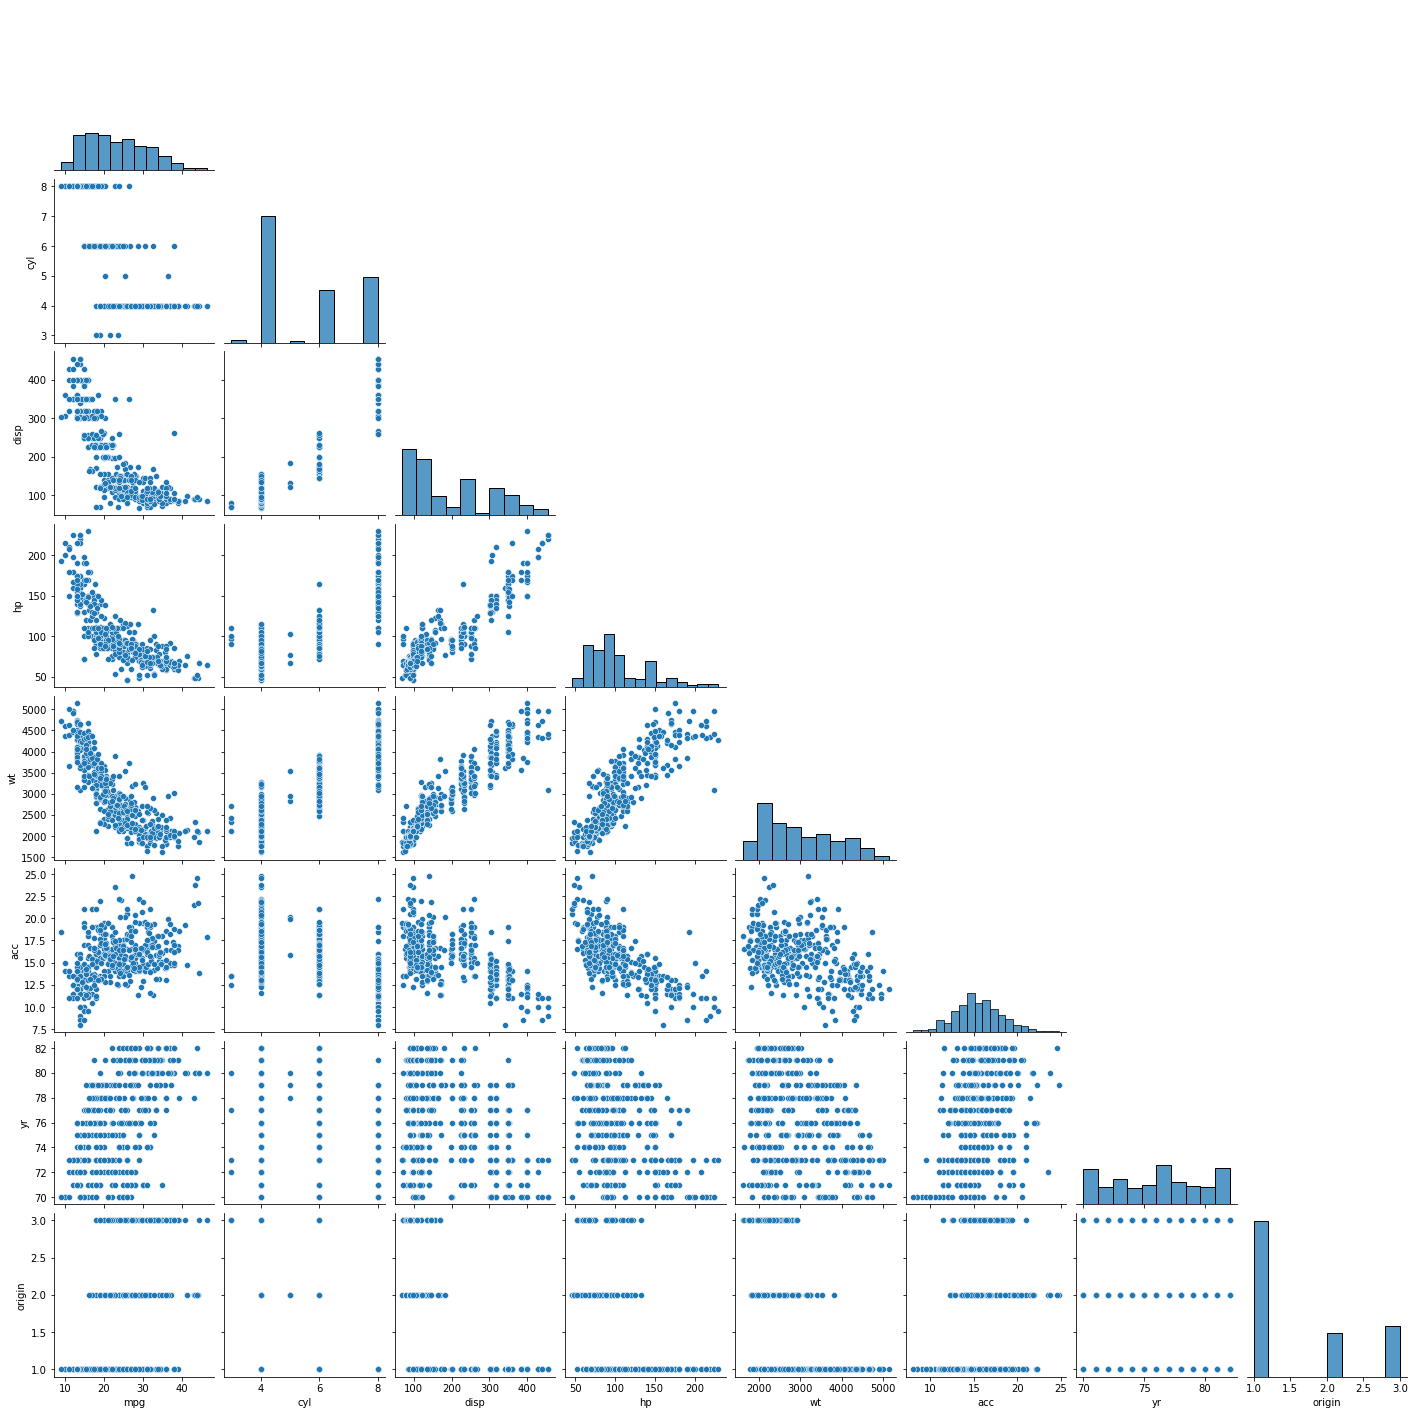

In [398]:
# C.	Plot a pairplot for all features
sns.pairplot(df, corner = True);

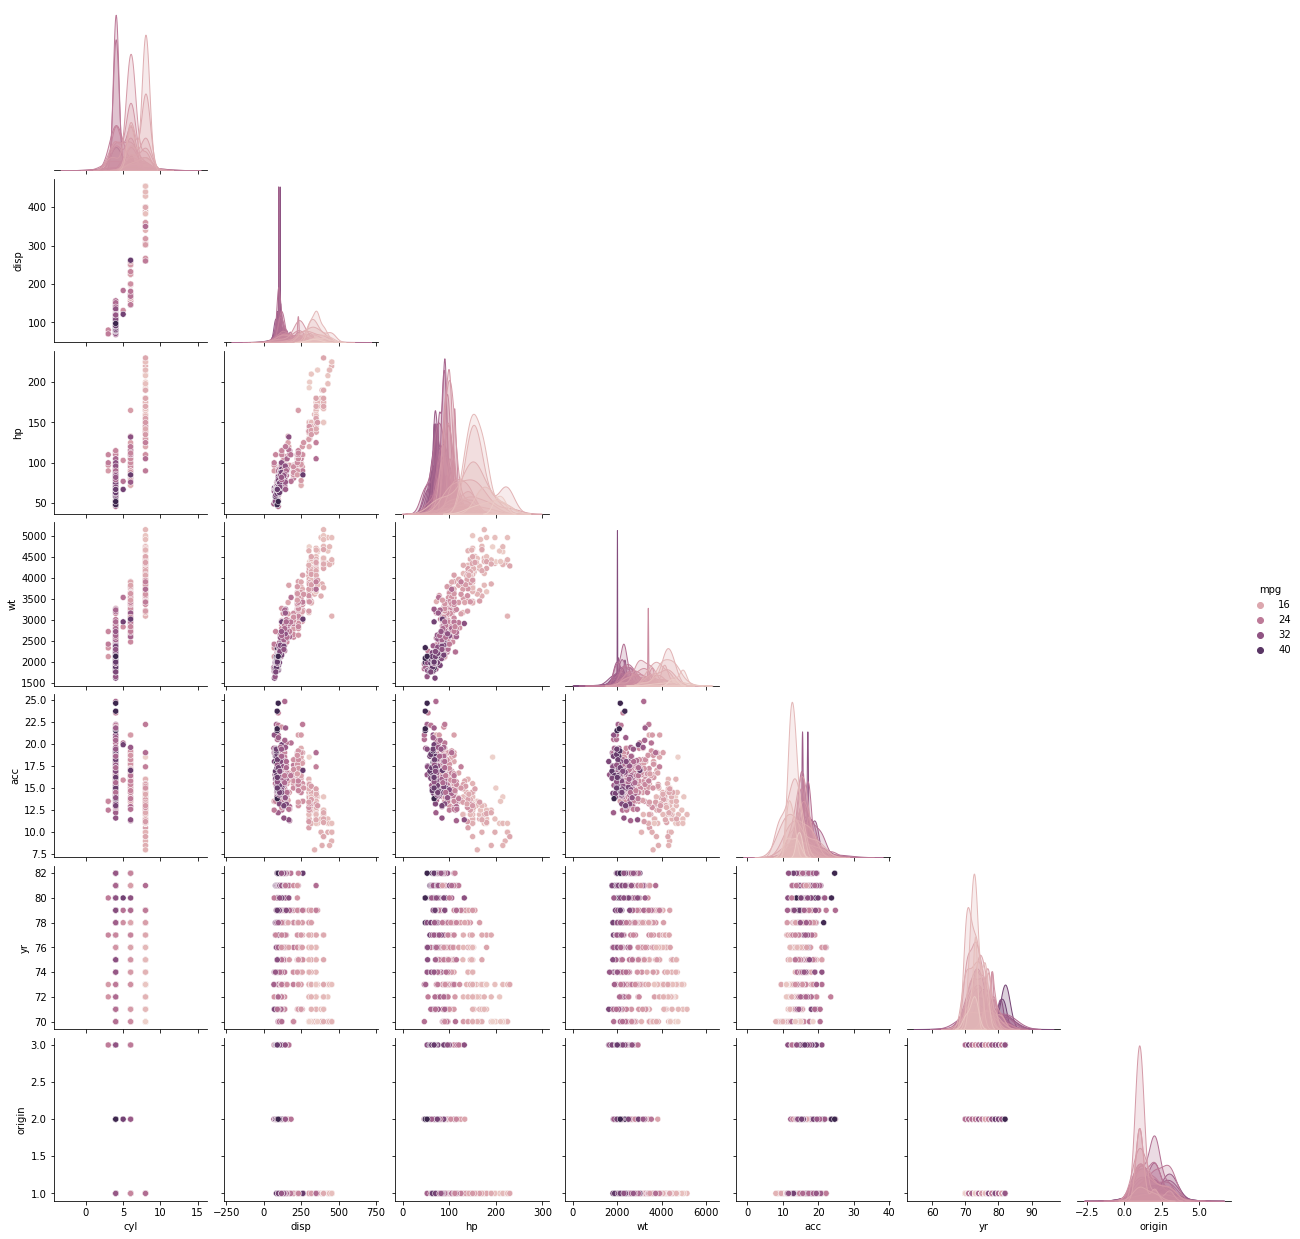

In [399]:
# Plot a pairplot for all features w.r.t to Feature mpg
sns.pairplot(df, corner = True, hue = 'mpg');

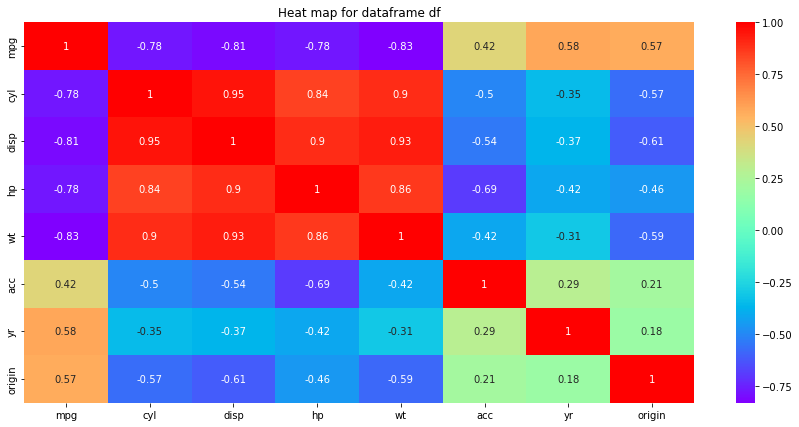

In [400]:
# Plotting the heat map for dataframe df
plt.figure(figsize = (15,7))
plt.title('Heat map for dataframe df')
sns.heatmap(df.corr(), annot = True, cmap = 'rainbow');

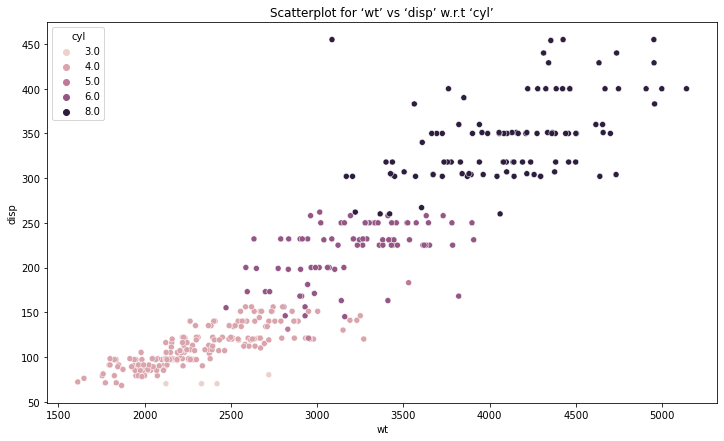

In [401]:
# D.	Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl’
plt.figure(figsize = (12,7))
plt.title('Scatterplot for ‘wt’ vs ‘disp’ w.r.t ‘cyl’')
sns.scatterplot(data = df, x = 'wt', y = 'disp', hue = 'cyl');

#### Observations:

1) E.	Share insights for Q2.d. - We can see that the Engine displacement increases significantly with the increase in the engine weight, since the engine needs to move more air and fuel, giving it the potential to make more power.
   This can be confirmed by looking at the number of cylinders, as the number of cylinder affects the displacement and weight positively.

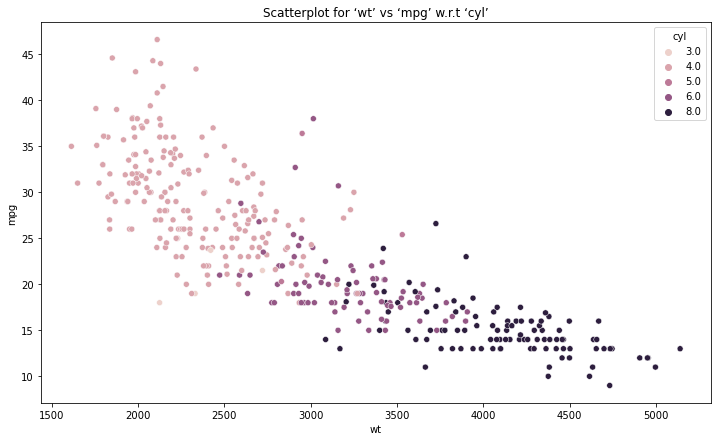

In [402]:
# F.	Visualize a scatterplot for ‘wt’ and ’mpg’. Datapoints should be distinguishable by ‘cyl’
plt.figure(figsize = (12,7))
plt.title('Scatterplot for ‘wt’ vs ‘mpg’ w.r.t ‘cyl’')
sns.scatterplot(data = df, x = 'wt', y = 'mpg', hue = 'cyl');

#### Observations:

1)  G.	Share insights for Q2.f. - We can see that the Engine mpg(mileage) increases significantly with the decrease in the engine weight, since lighter vehicles have lesser inertia which contributes to decreased fuel consumption.
   This can be confirmed by looking at the number of cylinders, as the number of cylinder affects the mpg positively but affects weight negatively.    

In [403]:
# Function that will accept a DataFrame as input and return Histogram & Boxplot for all the appropriate Numerical features
def num_var_distn(df_pie, fig_size_x = 15, fig_size_y = 3):
    
    num_cols = df_pie.select_dtypes(exclude = 'category').columns.to_list()

    for i in num_cols:
        fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (fig_size_x, fig_size_y))
        plt.suptitle("Histogram & Boxplot for {} feature".format(i), ha = 'center')
        sns.histplot(data = df_pie, x = i, ax = ax[0], fill = True, kde = True, color = 'Green')
        sns.boxplot(data = df_pie, x = i, ax = ax[1], color = 'Orange')
        #checking count of outliers
        q25, q75 = np.percentile(df_pie[i], 25), np.percentile(df_pie[i], 75)
        IQR = q75 - q25
        Threshold = IQR * 1.5
        lower, upper = q25 - Threshold, q75 + Threshold
        Outliers = [i for i in df_pie[i] if i < lower or i > upper]
        print('{} Total Number of outliers in {}: {}'.format('\033[1m',i,len(Outliers)))

 Total Number of outliers in mpg: 0
 Total Number of outliers in cyl: 0
 Total Number of outliers in disp: 0
 Total Number of outliers in hp: 10
 Total Number of outliers in wt: 0
 Total Number of outliers in acc: 11
 Total Number of outliers in yr: 0
 Total Number of outliers in origin: 0


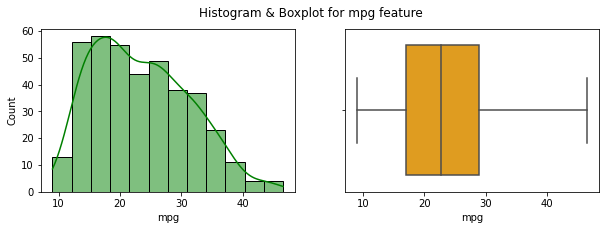

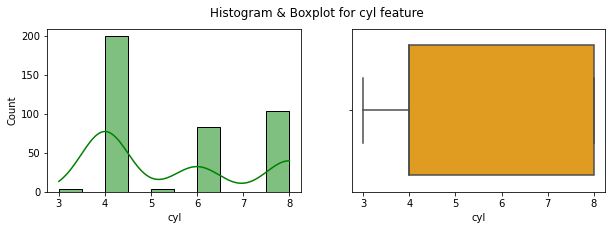

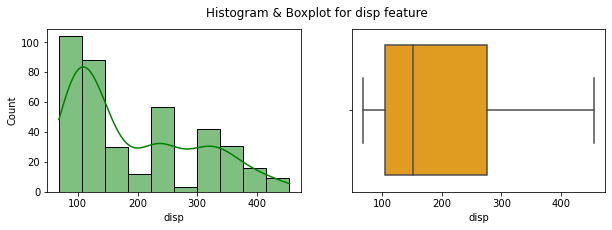

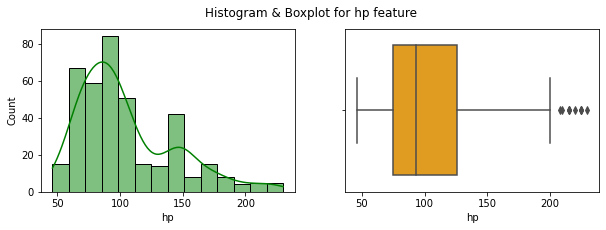

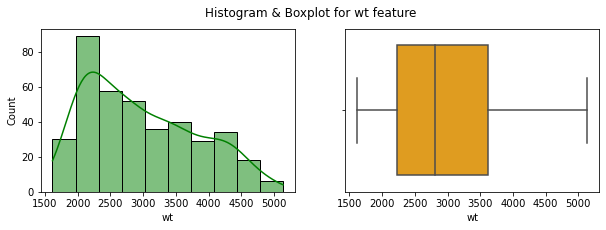

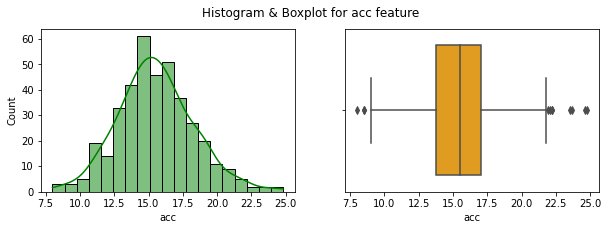

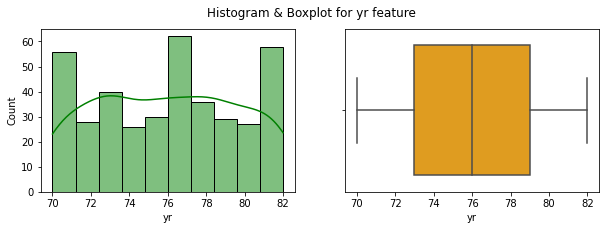

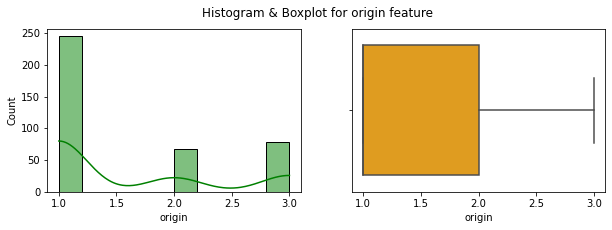

In [404]:
# Calling the function to plot Histogram & Boxplot for all Numerical features
num_var_distn(df, 10, 3)

In [405]:
# Function that will accept a DataFrame as input and return Histogram & Boxplot for all the appropriate Numerical features
def df_outlier_replace(df_pie):
    
    num_cols = df_pie.select_dtypes(include = 'float').columns.to_list()

    for i in num_cols:
        #checking count of outliers
        q25, q75 = np.percentile(df[i], 25), np.percentile(df[i], 75)
        IQR = q75 - q25
        Threshold = IQR * 1.5
        lower, upper = q25 - Threshold, q75 + Threshold
        Outliers = [i for i in df[i] if i < lower or i > upper]
        print('{} Total Number of outliers in {}: {}'.format('\033[1m',i,len(Outliers)))

## 3.	Clustering

In [406]:
# Scale the data
df_scaled = df.apply(zscore)

In [407]:
# Split the dataset for model train and test
df_scaled = df_scaled.iloc[:-5,:]
df_test = df.iloc[-5:,:]

In [408]:
df_scaled.head()

mpg       cyl      disp        hp        wt       acc        yr  \
0 -0.698638  1.483947  1.077290  0.664133  0.620540 -1.285258 -1.625315   
1 -1.083498  1.483947  1.488732  1.574594  0.843334 -1.466724 -1.625315   
2 -0.698638  1.483947  1.182542  1.184397  0.540382 -1.648189 -1.625315   
3 -0.955212  1.483947  1.048584  1.184397  0.536845 -1.285258 -1.625315   
4 -0.826925  1.483947  1.029447  0.924265  0.555706 -1.829655 -1.625315   

     origin  
0 -0.716641  
1 -0.716641  
2 -0.716641  
3 -0.716641  
4 -0.716641

In [409]:
df_test

mpg  cyl   disp    hp      wt   acc    yr  origin
387  27.0  4.0  140.0  86.0  2790.0  15.6  82.0     1.0
388  44.0  4.0   97.0  52.0  2130.0  24.6  82.0     2.0
389  32.0  4.0  135.0  84.0  2295.0  11.6  82.0     1.0
390  28.0  4.0  120.0  79.0  2625.0  18.6  82.0     1.0
391  31.0  4.0  119.0  82.0  2720.0  19.4  82.0     1.0

In [410]:
# A.	Apply K-Means clustering for 2 to 10 clusters
# Set the value of k = i
df_scaled_1 = df_scaled.copy(deep = True)
for i in np.arange(2,11): 
    kmeans = KMeans(n_clusters = i, n_init = 15, random_state = 1)
    
    kmeans.fit(df_scaled_1)
    
    centroids = kmeans.cluster_centers_
    
    #Calculate the centroids for the columns to profile
    centroid_df = pd.DataFrame(centroids, columns = list(df_scaled_1))
    
    print('*'*75)
    print('')
    print(centroid_df.head(1))
    print('*'*75)

***************************************************************************

        mpg       cyl      disp        hp        wt       acc        yr  \
0  0.665886 -0.770202 -0.759826 -0.619422 -0.723139  0.314954  0.298457   

    origin  
0  0.54341  
***************************************************************************
***************************************************************************

       mpg       cyl      disp        hp        wt       acc        yr  \
0 -1.12006  1.472207  1.453998  1.458836  1.354828 -1.023585 -0.606026   

     origin  
0 -0.716641  
***************************************************************************
***************************************************************************

        mpg       cyl      disp        hp       wt       acc        yr  \
0  1.216779 -0.807572 -0.796005 -0.746333 -0.80003  0.321411  1.095402   

     origin  
0  0.645904  
***************************************************************************
**********

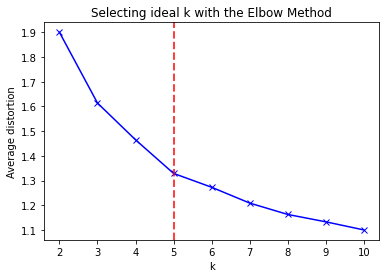

In [411]:
# B.	Plot a visual and find elbow point
# C.	On the above visual, highlight which are the possible Elbow points. 
# Finding optimal no. of clusters

clusters = range(2,11)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters = k)
    model.fit(df_scaled)
    prediction = model.predict(df_scaled)
    meanDistortions.append(sum(np.min(cdist(df_scaled, model.cluster_centers_, 'euclidean'), axis = 1)) / df_scaled.shape[0])

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.axvline(5, color = 'red', lw = 2, alpha = 0.75, linestyle = '--')
plt.title('Selecting ideal k with the Elbow Method');

#### Observations:

1) At k = 5 the distortion declines the most and can therefore be chosen as the optimal number of clusters for dataset.

In [412]:
# D.	Train a K-means clustering model once again on the optimal number of clusters. 
# Applying K-Means clustering for k = 5 clusters
df_scaled_2 = df_scaled.copy(deep = True)
kmeans = KMeans(n_clusters = 5, n_init = 15, random_state = 1)

kmeans.fit(df_scaled_2)

centroids = kmeans.cluster_centers_

#Clculate the centroids for the columns to profile
centroid_df = pd.DataFrame(centroids, columns = list(df_scaled_2))

centroid_df.head()

mpg       cyl      disp        hp        wt       acc        yr  \
0  1.340003 -0.812971 -0.905592 -0.829552 -0.965581  0.393693  0.915521   
1 -0.559929  0.442040  0.377479 -0.064562  0.384632  0.394206 -0.069201   
2  0.702840 -0.738917 -0.593263 -0.570854 -0.506839  0.361617  0.950200   
3 -1.156649  1.483947  1.489139  1.506794  1.391452 -1.075993 -0.682654   
4  0.149908 -0.835725 -0.819852 -0.491417 -0.738321  0.192703 -0.718189   

     origin  
0  1.517198  
1 -0.670028  
2 -0.614754  
3 -0.716641  
4  0.676144

In [413]:
# E.	Add a new feature in the DataFrame which will have labels based upon cluster value. 
# creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

In [414]:
df_labels.sample(5)

labels
223      1
226      1
210      3
230      3
320      0

In [415]:
# Joining the label dataframe with the scaled dataset
df_labeled = df_scaled_2.join(df_labels)

In [416]:
df_labeled.sample(5)

mpg       cyl      disp        hp        wt       acc        yr  \
309  1.110203 -0.864014 -0.922511 -0.896659 -1.010922 -0.014999  1.092789   
365  0.969088 -0.864014 -0.788553 -0.506461 -0.474567  0.239053  1.636410   
46  -0.570352  0.309967  0.531890 -0.116263  0.358846 -0.196464 -1.353505   
196  1.225661 -0.864014 -0.989490 -1.338883 -1.394033  0.674571  0.005547   
52   0.969088 -0.864014 -1.180858 -1.026725 -1.419967  1.255261 -1.353505   

       origin labels  
309 -0.716641      2  
365 -0.716641      2  
46  -0.716641      1  
196  1.769406      0  
52   1.769406      4

In [417]:
# Checking the distribution of the Labels created after clustering
df_labeled['labels'].value_counts().to_frame()

labels
3      94
4      83
1      80
0      69
2      61

In [418]:
# the groupby creates a grouped dataframe that needs to be converted back to dataframe
df_analysis = (df_labeled.groupby(['labels'] , axis = 0))

In [419]:
 df_analysis.head(1)

mpg       cyl      disp        hp        wt       acc        yr  \
0   -0.698638  1.483947  1.077290  0.664133  0.620540 -1.285258 -1.625315   
14   0.071081 -0.864014 -0.778984 -0.246329 -0.713864 -0.196464 -1.625315   
15  -0.185492  0.309967  0.034332 -0.246329 -0.170436 -0.014999 -1.625315   
127  0.969088 -0.864014 -1.104311 -0.974698 -1.211319  1.255261 -0.538074   
166 -0.057205 -0.864014 -0.520637 -0.558487 -0.399124  0.529398 -0.266263   

       origin labels  
0   -0.716641      3  
14   1.769406      4  
15  -0.716641      1  
127  1.769406      0  
166 -0.716641      2

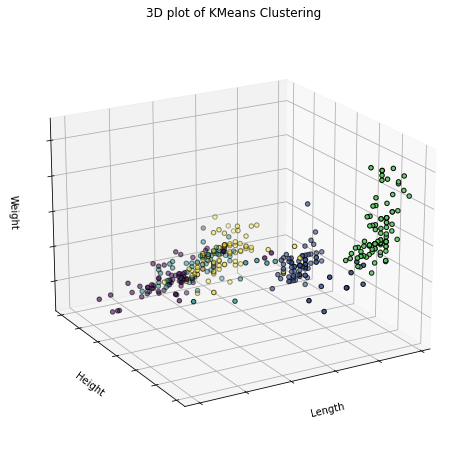

In [420]:
# F.	Plot a visual and color the datapoints based upon clusters
# 3D plots of clusters
fig = plt.figure(figsize = (8, 6))
ax = Axes3D(fig, rect = [0, 0, .95, 1], elev = 20, azim = 60)
kmeans.fit(df_scaled_2)
labels = kmeans.labels_
ax.scatter(df_scaled_2.iloc[:, 0], df_scaled_2.iloc[:, 1], df_scaled_2.iloc[:, 3],c = labels.astype(np.float), edgecolor = 'k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D plot of KMeans Clustering');

### Model Improvement

#### K-Means++ is a smart centroid initialization technique and the rest of the algorithm is the same as that of K-Means.

#### k means++ removes the drawback of K means which is it is dependent on initialization of centroid.

In [421]:
# Applying K-Means++ clustering for k = 5 clusters
df_scaled_3 = df_scaled.copy(deep = True)

kmeans_3 = KMeans(n_clusters = 5, init = 'k-means++', n_init = 15, random_state = 1)

kmeans_3.fit(df_scaled_3)

centroids_3 = kmeans_3.cluster_centers_

#Clculate the centroids for the columns to profile
centroid_df_3 = pd.DataFrame(centroids_3, columns = list(df_scaled_3))

print(centroid_df_3.head())

        mpg       cyl      disp        hp        wt       acc        yr  \
0  1.340003 -0.812971 -0.905592 -0.829552 -0.965581  0.393693  0.915521   
1 -0.559929  0.442040  0.377479 -0.064562  0.384632  0.394206 -0.069201   
2  0.702840 -0.738917 -0.593263 -0.570854 -0.506839  0.361617  0.950200   
3 -1.156649  1.483947  1.489139  1.506794  1.391452 -1.075993 -0.682654   
4  0.149908 -0.835725 -0.819852 -0.491417 -0.738321  0.192703 -0.718189   

     origin  
0  1.517198  
1 -0.670028  
2 -0.614754  
3 -0.716641  
4  0.676144  


In [422]:
# creating a new dataframe only for labels and converting it into categorical variable
df_labels_3 = pd.DataFrame(kmeans_3.labels_ , columns = list(['labels']))

df_labels_3['labels'] = df_labels_3['labels'].astype('category')

In [423]:
df_labels_3.sample(5)

labels
41       3
341      0
127      0
77       4
349      0

In [424]:
# Joining the label dataframe with the scaled dataset
df_labeled_3 = df_scaled_3.join(df_labels_3)

In [425]:
df_labeled_3.head()

mpg       cyl      disp        hp        wt       acc        yr  \
0 -0.698638  1.483947  1.077290  0.664133  0.620540 -1.285258 -1.625315   
1 -1.083498  1.483947  1.488732  1.574594  0.843334 -1.466724 -1.625315   
2 -0.698638  1.483947  1.182542  1.184397  0.540382 -1.648189 -1.625315   
3 -0.955212  1.483947  1.048584  1.184397  0.536845 -1.285258 -1.625315   
4 -0.826925  1.483947  1.029447  0.924265  0.555706 -1.829655 -1.625315   

     origin labels  
0 -0.716641      3  
1 -0.716641      3  
2 -0.716641      3  
3 -0.716641      3  
4 -0.716641      3

In [426]:
# Checking the distribution of the Labels created after clustering
df_labeled_3['labels'].value_counts().to_frame()

labels
3      94
4      83
1      80
0      69
2      61

In [427]:
# the groupby creates a grouped dataframe that needs to be converted back to dataframe
df_analysis_3 = (df_labeled_3.groupby(['labels'] , axis = 0))

In [428]:
df_analysis_3.head(1)

mpg       cyl      disp        hp        wt       acc        yr  \
0   -0.698638  1.483947  1.077290  0.664133  0.620540 -1.285258 -1.625315   
14   0.071081 -0.864014 -0.778984 -0.246329 -0.713864 -0.196464 -1.625315   
15  -0.185492  0.309967  0.034332 -0.246329 -0.170436 -0.014999 -1.625315   
127  0.969088 -0.864014 -1.104311 -0.974698 -1.211319  1.255261 -0.538074   
166 -0.057205 -0.864014 -0.520637 -0.558487 -0.399124  0.529398 -0.266263   

       origin labels  
0   -0.716641      3  
14   1.769406      4  
15  -0.716641      1  
127  1.769406      0  
166 -0.716641      2

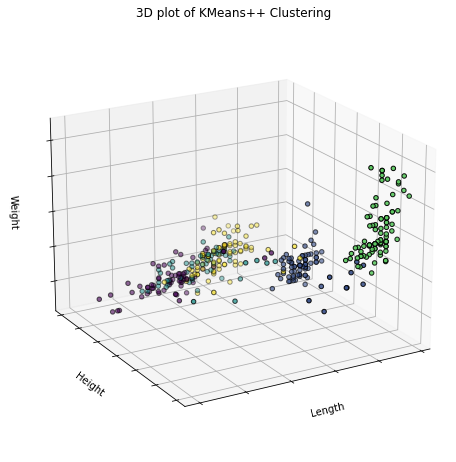

In [429]:
# 3D plots of clusters
fig = plt.figure(figsize = (8, 6))
ax = Axes3D(fig, rect = [0, 0, .95, 1], elev = 20, azim = 60)
kmeans_3.fit(df_scaled_3)
labels = kmeans_3.labels_
ax.scatter(df_scaled_3.iloc[:, 0], df_scaled_3.iloc[:, 1], df_scaled_3.iloc[:, 3], c = labels.astype(np.float), edgecolor = 'k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D plot of KMeans++ Clustering');

#### Observations:

1) We can see that there is no difference in the Labels created using KMeans or KMeans++ algorithms.

In [430]:
df_test_pred = kmeans.predict(df_test)

In [431]:
df_test_pred

array([3, 3, 3, 3, 3])

In [432]:
df_test

mpg  cyl   disp    hp      wt   acc    yr  origin
387  27.0  4.0  140.0  86.0  2790.0  15.6  82.0     1.0
388  44.0  4.0   97.0  52.0  2130.0  24.6  82.0     2.0
389  32.0  4.0  135.0  84.0  2295.0  11.6  82.0     1.0
390  28.0  4.0  120.0  79.0  2625.0  18.6  82.0     1.0
391  31.0  4.0  119.0  82.0  2720.0  19.4  82.0     1.0

## End of Part A

## Part B

•	DOMAIN: Automobile
•	CONTEXT: The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.
•	DATA DESCRIPTION: The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.
•	All the features are numeric i.e. geometric features extracted from the silhouette.
•	PROJECT OBJECTIVE: Apply dimensionality reduction technique – PCA and train a model and compare relative results.
•	STEPS AND TASK [30 Marks]:
1.	Data Understanding & Cleaning: [5 Marks]
A.	Read ‘vehicle.csv’ and save as DataFrame. [1 Marks]

B.	Check percentage of missing values and impute with correct approach. [1 Marks]

C.	Visualize a Pie-chart and print percentage of values for variable ‘class’. [2 Marks]

D.	Check for duplicate rows in the data and impute with correct approach. [1 Marks]

2.	Data Preparation: [2 Marks]
A.	Split data into X and Y. [Train and Test optional] [1 Marks]

B.	Standardize the Data. [1 Marks]

3.	Model Building: [13 Marks]
A.	Train a base Classification model using SVM. [1 Marks]

B.	Print Classification metrics for train data. [1 Marks]

C.	Apply PCA on the data with 10 components. [3 Marks]

D.	Visualize Cumulative Variance Explained with Number of Components. [2 Marks]

E.	Draw a horizontal line on the above plot to highlight the threshold of 90%. [1 Marks]

F.	Apply PCA on the data. This time Select Minimum Components with 90% or above variance explained. [2 Marks]

G.	Train SVM model on components selected from above step. [1 Marks]

H.	Print Classification metrics for train data of above model and share insights. [2 Marks]

4.	Performance Improvement: [5 Marks]
A.	Train another SVM on the components out of PCA. Tune the parameters to improve performance. [2 Marks]

B.	Share best Parameters observed from above step. [1 Marks]

C.	Print Classification metrics for train data of above model and share relative improvement in performance in all the models along with insights. [2 Marks]
5.	Data Understanding & Cleaning: [5 Marks]
A.	Explain pre-requisite/assumptions of PCA. [2 Marks]

B.	Explain advantages and limitations of PCA. [3 Marks]


## 1.	Data Understanding & Cleaning: 

In [433]:
# A.	Read ‘vehicle.csv’ and save as DataFrame
df_1 = pd.read_csv("vehicle.csv")

In [434]:
# checking a data sample in dataframe df_1
df_1.head(5)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [435]:
# dataframe df_1 shape
df_1.shape

(846, 19)

In [436]:
# dataframe df_1 information
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [437]:
# B.	Check percentage of missing values and impute with correct approach. 
percent_missing = (df_1.isna().sum()/ len(df)) * 100
percent_missing.to_frame()

0
compactness                  0.000000
circularity                  1.275510
distance_circularity         1.020408
radius_ratio                 1.530612
pr.axis_aspect_ratio         0.510204
max.length_aspect_ratio      0.000000
scatter_ratio                0.255102
elongatedness                0.255102
pr.axis_rectangularity       0.765306
max.length_rectangularity    0.000000
scaled_variance              0.765306
scaled_variance.1            0.510204
scaled_radius_of_gyration    0.510204
scaled_radius_of_gyration.1  1.020408
skewness_about               1.530612
skewness_about.1             0.255102
skewness_about.2             0.255102
hollows_ratio                0.000000
class                        0.000000

In [438]:
# Checking the medians of all the numeric features in the dataset
df_1.median().to_frame()

0
compactness                   93.0
circularity                   44.0
distance_circularity          80.0
radius_ratio                 167.0
pr.axis_aspect_ratio          61.0
max.length_aspect_ratio        8.0
scatter_ratio                157.0
elongatedness                 43.0
pr.axis_rectangularity        20.0
max.length_rectangularity    146.0
scaled_variance              179.0
scaled_variance.1            363.5
scaled_radius_of_gyration    173.5
scaled_radius_of_gyration.1   71.5
skewness_about                 6.0
skewness_about.1              11.0
skewness_about.2             188.0
hollows_ratio                197.0

In [439]:
# B.	Check percentage of missing values and impute with correct approach. 
df_1 = df_1.fillna(df_1.median())

In [440]:
# Checing for Null values in the dataset
percent_missing = (df_1.isna().sum()/ len(df)) * 100
percent_missing.to_frame()

0
compactness                  0.0
circularity                  0.0
distance_circularity         0.0
radius_ratio                 0.0
pr.axis_aspect_ratio         0.0
max.length_aspect_ratio      0.0
scatter_ratio                0.0
elongatedness                0.0
pr.axis_rectangularity       0.0
max.length_rectangularity    0.0
scaled_variance              0.0
scaled_variance.1            0.0
scaled_radius_of_gyration    0.0
scaled_radius_of_gyration.1  0.0
skewness_about               0.0
skewness_about.1             0.0
skewness_about.2             0.0
hollows_ratio                0.0
class                        0.0

In [441]:
# D.	Check for duplicate rows in the data and impute with correct approach
df_1[df_1.duplicated()].count()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

#### Observations:

1) There are no Duplicate values in the dataset.

In [442]:
# Changing datatypes of categorical features to 'category'
cat_cols = df_1.select_dtypes(include = 'object').columns.to_list()
for i in cat_cols:
    df_1[i] = df_1[i].astype('category')

In [443]:
# Changing datatypes of numerical features to float
num_cols = df_1.select_dtypes(include = ['int','float']).columns.to_list()
for i in num_cols:
    df_1[i] = df_1[i].astype('float')

In [444]:
# dataframe df_1 information
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   compactness                  846 non-null    float64 
 1   circularity                  846 non-null    float64 
 2   distance_circularity         846 non-null    float64 
 3   radius_ratio                 846 non-null    float64 
 4   pr.axis_aspect_ratio         846 non-null    float64 
 5   max.length_aspect_ratio      846 non-null    float64 
 6   scatter_ratio                846 non-null    float64 
 7   elongatedness                846 non-null    float64 
 8   pr.axis_rectangularity       846 non-null    float64 
 9   max.length_rectangularity    846 non-null    float64 
 10  scaled_variance              846 non-null    float64 
 11  scaled_variance.1            846 non-null    float64 
 12  scaled_radius_of_gyration    846 non-null    float64 
 13  scale

 Total Number of outliers in compactness: 0
 Total Number of outliers in circularity: 0
 Total Number of outliers in distance_circularity: 0
 Total Number of outliers in radius_ratio: 3
 Total Number of outliers in pr.axis_aspect_ratio: 8
 Total Number of outliers in max.length_aspect_ratio: 13
 Total Number of outliers in scatter_ratio: 0
 Total Number of outliers in elongatedness: 0
 Total Number of outliers in pr.axis_rectangularity: 0
 Total Number of outliers in max.length_rectangularity: 0
 Total Number of outliers in scaled_variance: 1
 Total Number of outliers in scaled_variance.1: 2
 Total Number of outliers in scaled_radius_of_gyration: 0
 Total Number of outliers in scaled_radius_of_gyration.1: 15
 Total Number of outliers in skewness_about: 12
 Total Number of outliers in skewness_about.1: 1
 Total Number of outliers in skewness_about.2: 0
 Total Number of outliers in hollows_ratio: 0


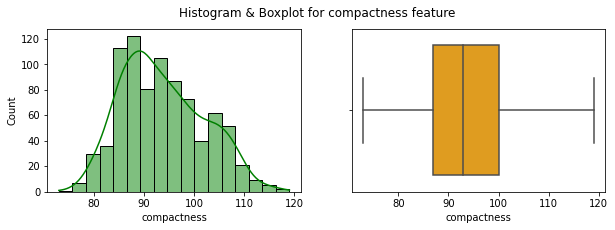

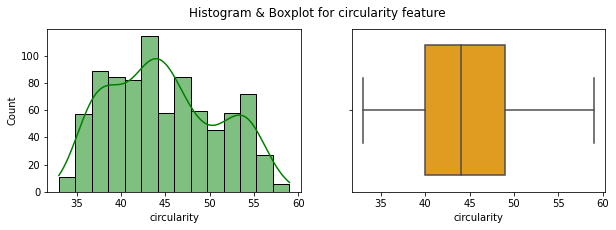

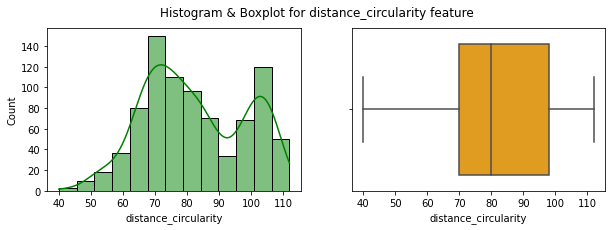

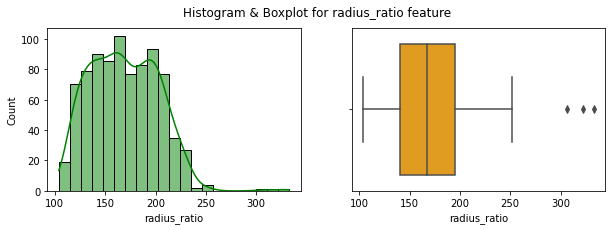

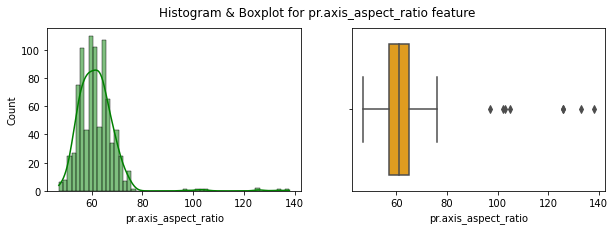

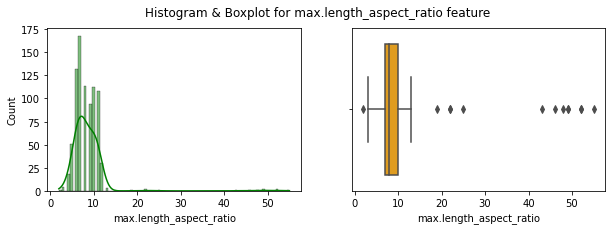

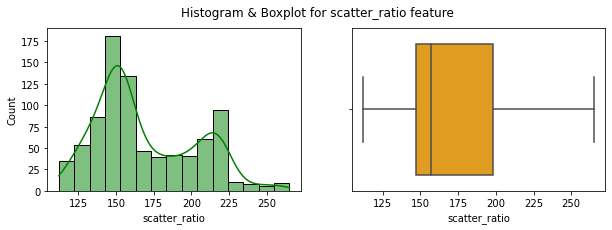

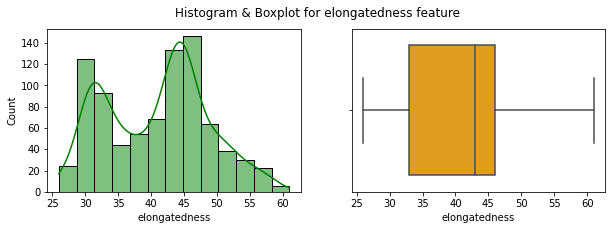

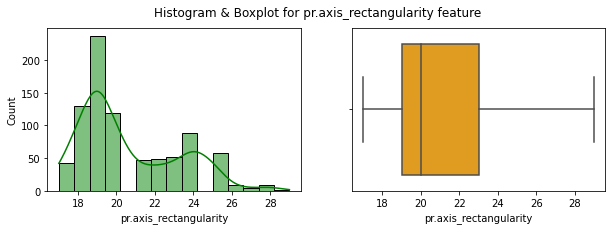

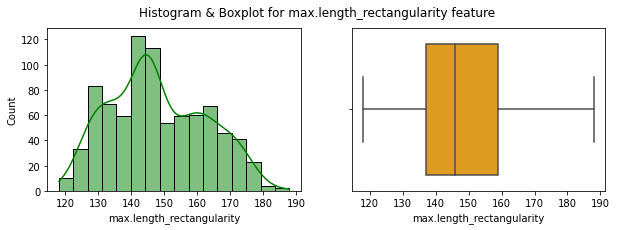

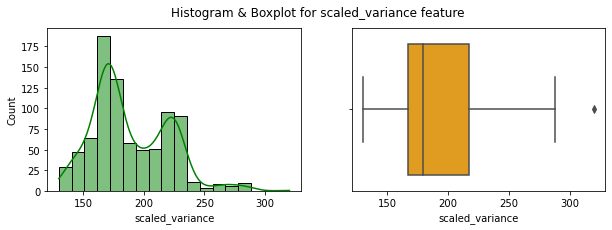

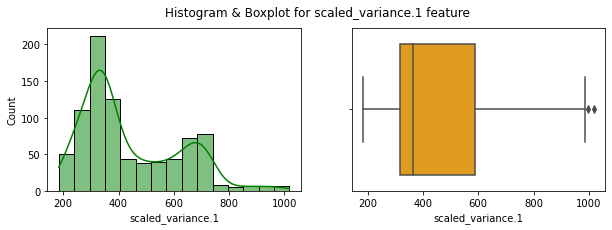

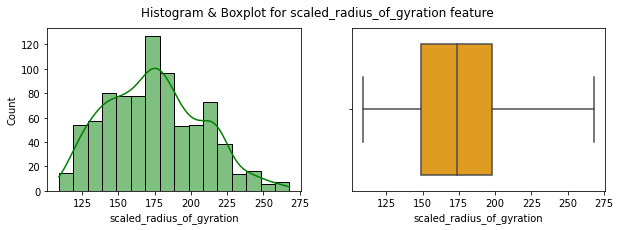

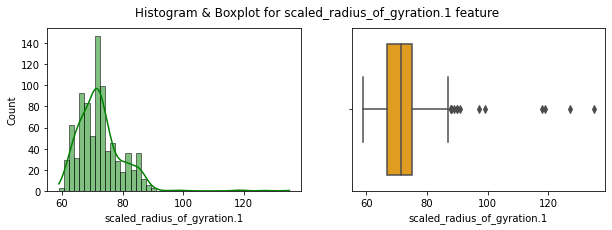

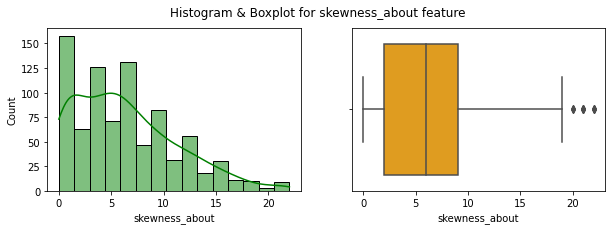

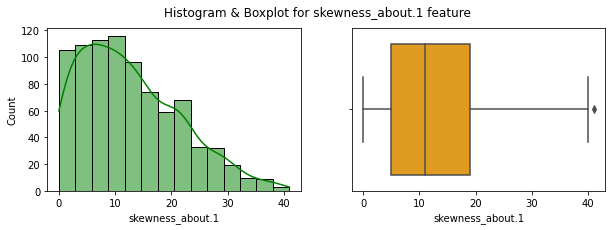

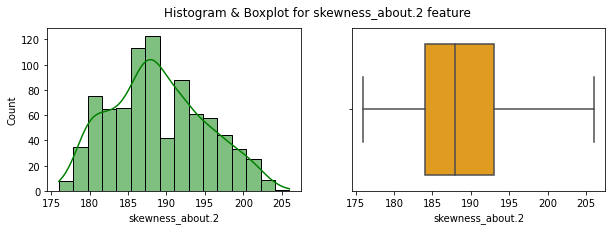

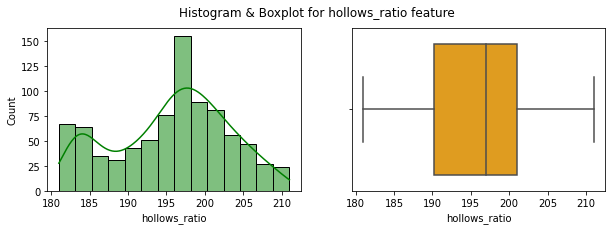

In [445]:
# Calling the function to plot Histogram & Boxplot for all Numerical features
num_var_distn(df_1, 10, 3)

#### Observations:

1) There is skewness in some of the features like, scatter_ratio, scaled_variance, scaled_variance.1 that have a Positive(Right) skewness

2) Some of the features are multimodal like, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, scaled_variance, scaled_variance.1, hollows_ratio

2) The following features in the dataset have Outiers: radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scaled_variance, scaled_variance.1, scaled_radius_of_gyration.1, skewness_about, skewness_about.1

In [446]:
df_1.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.823877    6.134272   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.874704   33.401356  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.677305    7.882188   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.596927   31.360427  130.0  167.00   
scaled_variance.1            846.0  439.314421  176.496341  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.443262    7.468734   59.0   67.00   
skewness_about               846.0    6.361702    4.903244    0.0    2.00   
skewness_about.1             846.0   12.600473    8.930962    0.0    5.00   
skewness_about.2             846.0  188.918440    6.152247  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 167.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            363.5  586.75  1018.0  
scaled_radius_of_gyration    173.5  198.00   268.0  
scaled_radius_of_gyration.1   71.5   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0

In [447]:
# Function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features
def cat_var_pie(df_pie, col_cnt, fig_size_x = 15, fig_size_y = 15):
    
    ncols = col_cnt
    cat_cols = df_pie.select_dtypes(include = 'category').columns.to_list()
    r = len(cat_cols)
    nrows = r // ncols + (r % ncols > 0)
    index = 1
    plt.figure(figsize = (fig_size_x, fig_size_y))
    
    for col in cat_cols:
        plt.subplot(nrows, ncols, index)
        plt.title(" Pie chart for Feature: {}".format(col), ha = 'center')
        df_pie[col].value_counts().plot.pie(autopct = '%1.1f%%', shadow = True)
        index += 1;

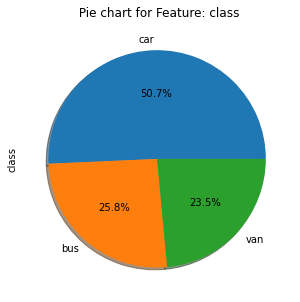

In [448]:
# C.	Visualize a Pie-chart and print percentage of values for variable ‘class’.
cat_var_pie(df_1, 1, 5, 5)

#### Observations:

1) Cars are almost double in number as compared to buses and vans. 

2) Vans are the least in number.

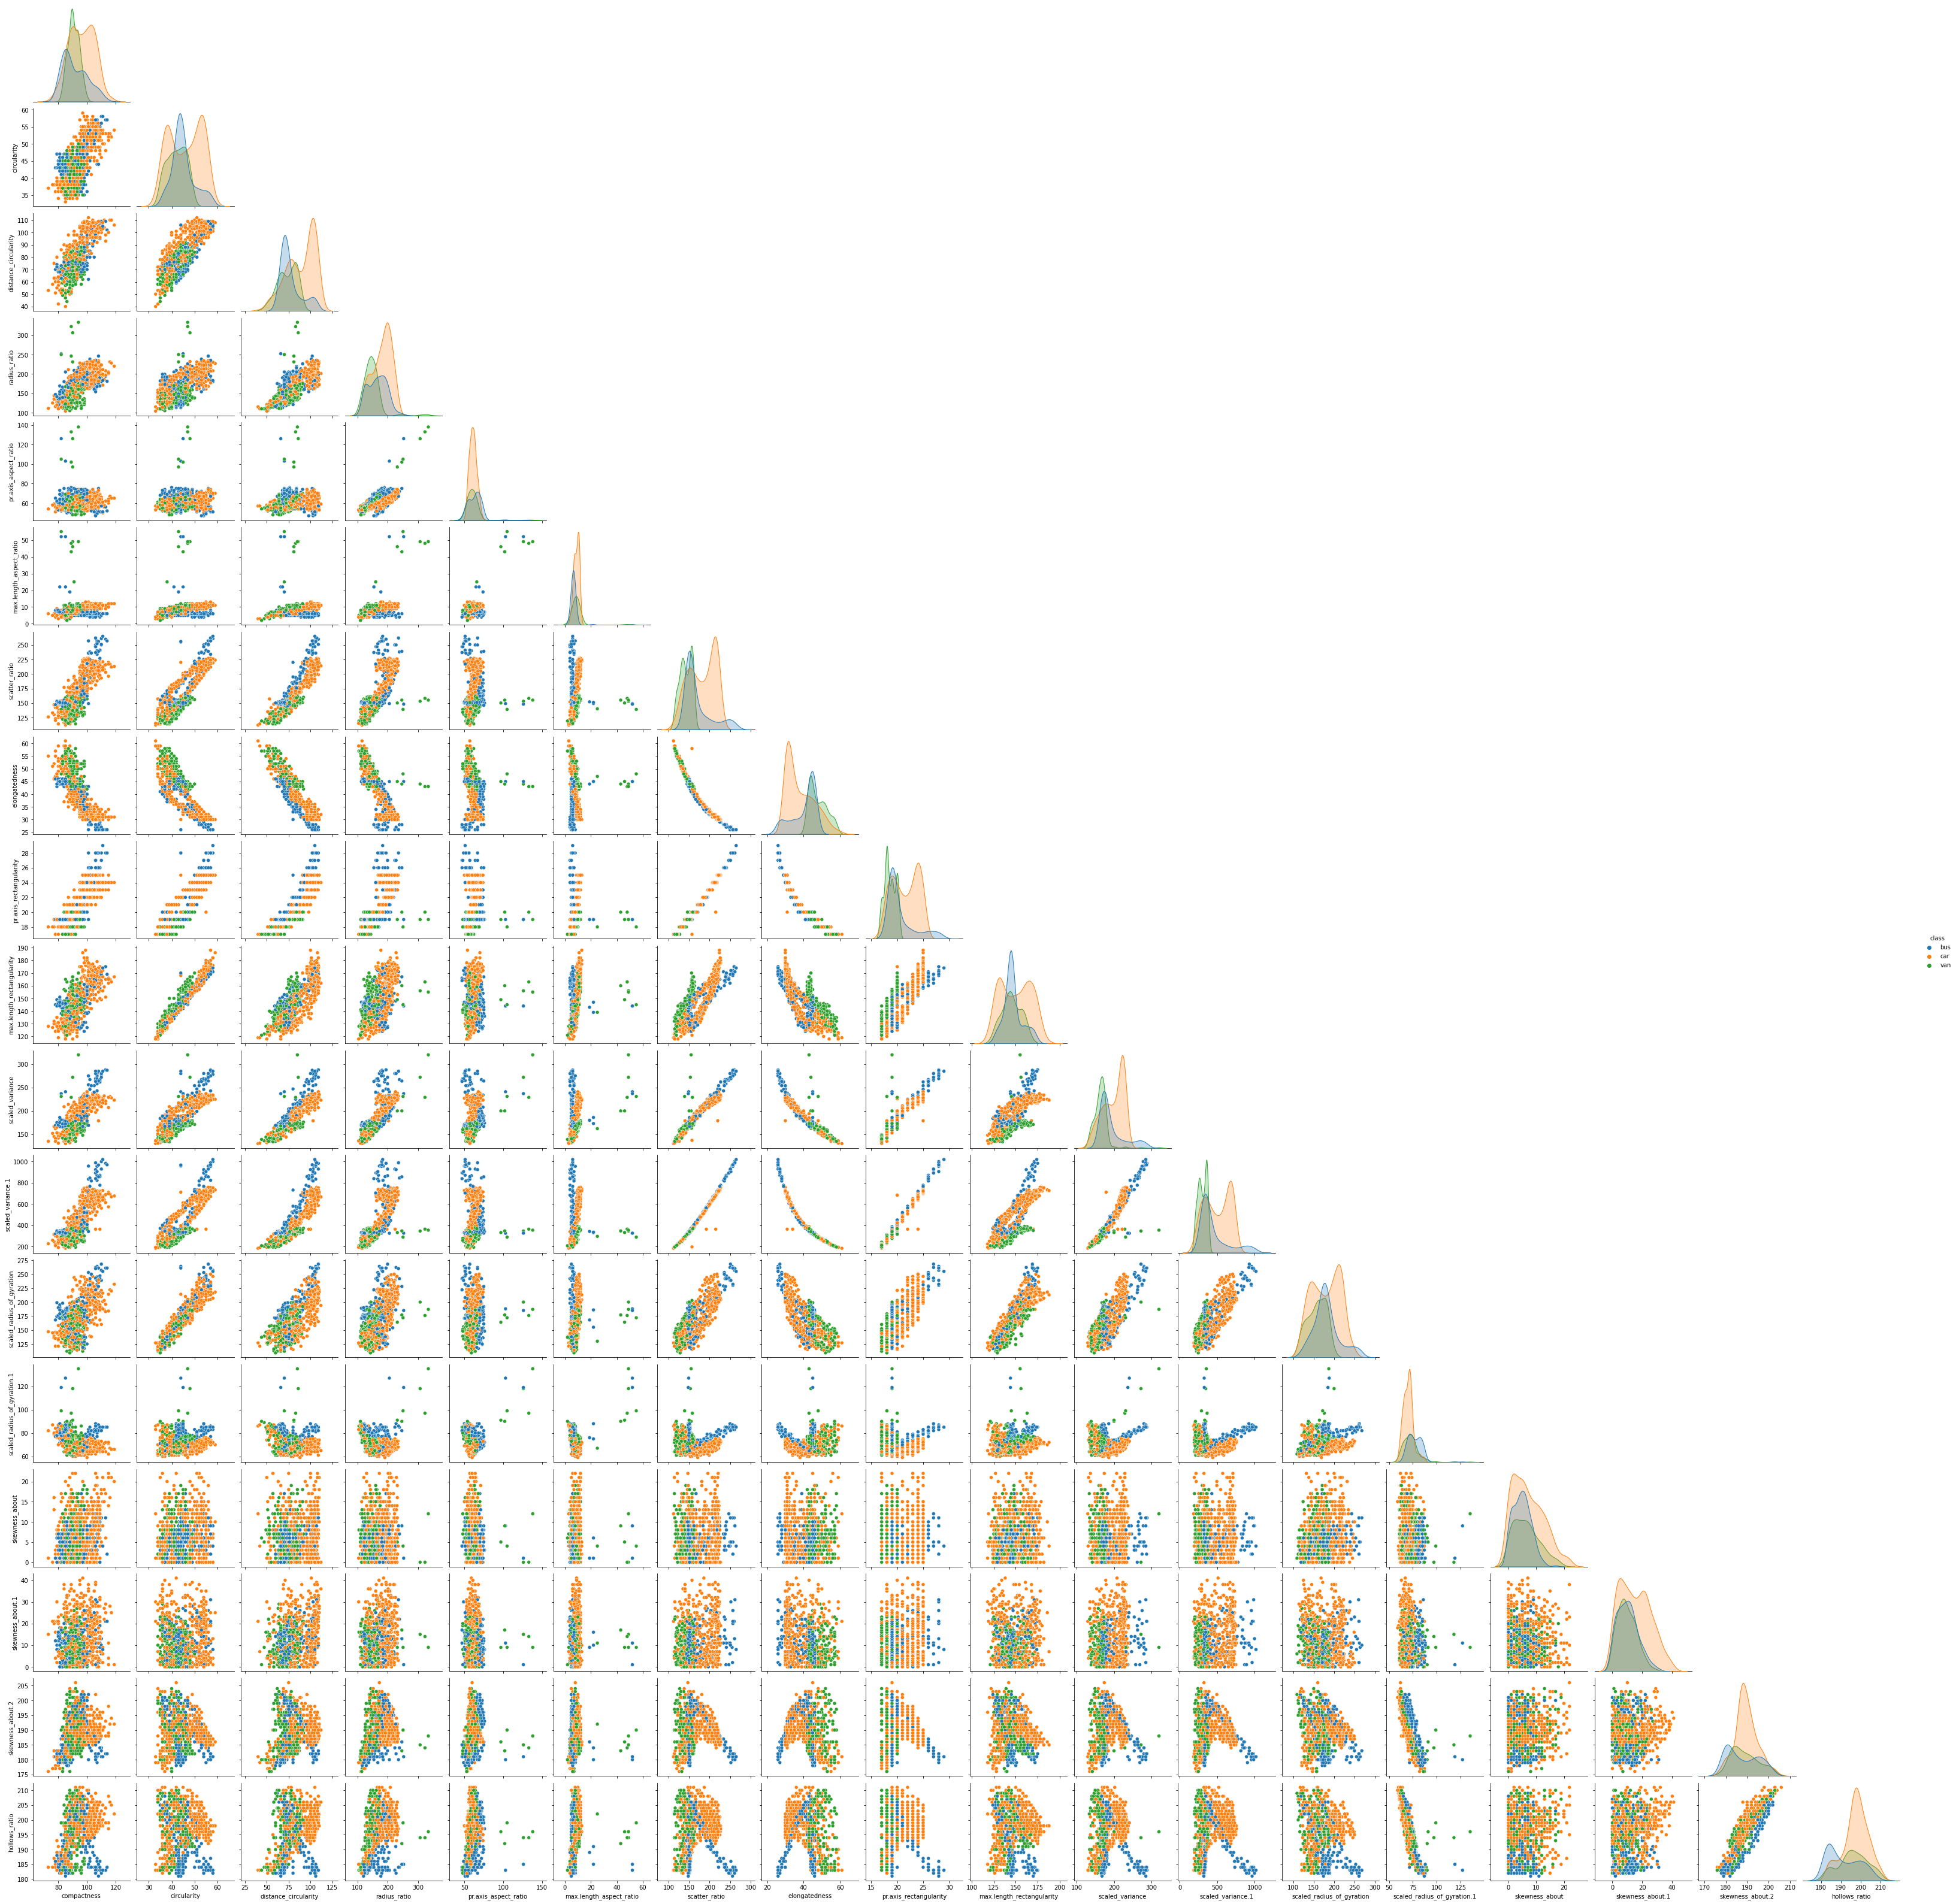

In [449]:
# Plotting the pairplot for dataframe df_1 w.r.t class
sns.pairplot(df_1, hue = 'class' , corner = True);

#### Observations:

Spread of compactness is least for van. mean compactness is highest for car. For Bus compactness is right skewed indicating that less number of buses have high compactness.

Mean circularity is higher for cars

Mean distance_circularity is also higher for cars

Mean radius_ratio is higher for cars, followed by Bus. It is least for vans

pr.axis_aspect_ratio is has almost same distribution for car, van and buses

max.length_aspect_ratio is almost same for cars and vans, lower for buses

Mean scatter ratio is highest for cars, followed by bus and van

Mean elomngatedness is highest for vans folowed by bus and car

pr.axis_rectangularity is highest for cars, followed by bus and then vans

distribution of max.length_rectangularity is almost same for cars, bus and vans

Mean scaled variance is highest for cars followed by bus then vans

Mean scaled variance1 is highest for cars followed by bus then vans

'scaled_radius_of_gyration', 'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1', 'skewness_about.2', have almost similar distribution for cars, buses and vans.

'hollows_ratio' is lower for buses as compared to cars and vans
Many columns have lonmg tails indicating outliers

pr.axis_aspect ratio and radius ratio varies strongly +ve for van. for cars and buses it varies in small range- mostly cpuld like

Scatter ratio & Scaled_variance1 has almost perfect positive linear relationship
Many features show high correlation indicating that we need to drop multiple features- we will use PCA for the same

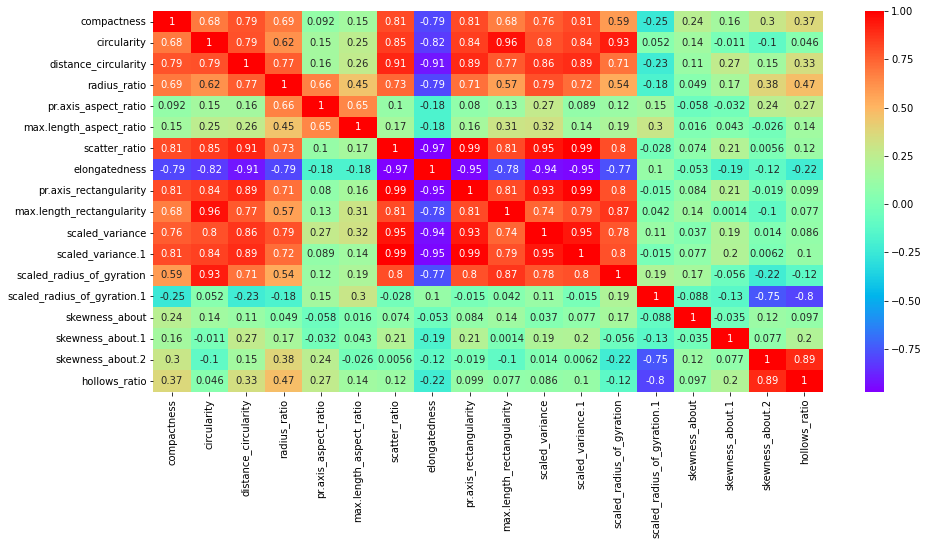

In [450]:
# Plotting the heat map for dataframe df_1
plt.figure(figsize = (15,7))
sns.heatmap(df_1.corr(), annot = True, cmap = 'rainbow');

#### Observations:

1) From above correlation matrix, we can see that there are many features which are highly correlated. 

2) scaled_variance.1 and scatter_ratio has correlation of 1 and many other features also have 0.9(positive or negative) correlation, e.g sekweness_abou2 and hollows_ratio, scaled variance & scaled_variance1, elongatedness & scaled variance, elongatedness & scaled variance1 etc.

3) There are lot of dimensions with correlation above +- 0.7 and it is difficult to determine which dimensions to drop manually. Thereore, will use PCA to determine it.

## 2.	Data Preparation:

In [451]:
# A.	Split data into X and Y. [Train and Test optional] 
X = df_1.iloc[:,:-1]
y = df_1.iloc[:,-1:]

In [452]:
# B.	Standardize the Data. 
XScaled  = X.apply(zscore)  # convert all the attributes to Z scale
XScaled.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.518073              0.057177      0.273363   
1    -0.325470    -0.623732              0.120741     -0.835032   
2     1.254193     0.844303              1.519141      1.202018   
3    -0.082445    -0.623732             -0.006386     -0.295813   
4    -1.054545    -0.134387             -0.769150      1.082192   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.310398                 0.311542      -0.207598   
1             -0.593753                 0.094079      -0.599423   
2              0.548738                 0.311542       1.148719   
3              0.167907                 0.094079      -0.750125   
4              5.245643                 9.444962      -0.599423   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.136262               -0.224342                   0.758332   
1       0.520519               -0.610886                  -0.344578   
2      -1.144597                0.935290                   0.689401   
3       0.648605               -0.610886                  -0.344578   
4       0.520519               -0.610886                  -0.275646   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.401920          -0.341934                   0.285705   
1        -0.593357          -0.619724                  -0.513630   
2         1.097671           1.109379                   1.392477   
3        -0.912419          -0.738777                  -1.466683   
4         1.671982          -0.648070                   0.408680   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.327326       -0.073812          0.380870   
1                    -0.059384        0.538390          0.156798   
2                     0.074587        1.558727         -0.403383   
3                    -1.265121       -0.073812         -0.291347   
4                     7.309005        0.538390         -0.179311   

   skewness_about.2  hollows_ratio  
0         -0.312012       0.183957  
1          0.013265       0.452977  
2         -0.149374       0.049447  
3          1.639649       1.529056  
4         -1.450481      -1.699181

In [453]:
# Dataframe basic statistics and 5-point summary
XScaled.describe().T

count          mean       std       min  \
compactness                  846.0  5.572112e-16  1.000592 -2.512695   
circularity                  846.0 -1.018361e-16  1.000592 -1.928651   
distance_circularity         846.0  2.370051e-16  1.000592 -2.676060   
radius_ratio                 846.0  8.871286e-17  1.000592 -1.943427   
pr.axis_aspect_ratio         846.0  3.732239e-16  1.000592 -1.863187   
max.length_aspect_ratio      846.0 -2.036721e-16  1.000592 -1.428157   
scatter_ratio                846.0 -4.391024e-16  1.000592 -1.714617   
elongatedness                846.0 -8.582575e-17  1.000592 -1.913112   
pr.axis_rectangularity       846.0 -4.320159e-16  1.000592 -1.383974   
max.length_rectangularity    846.0  7.968409e-16  1.000592 -2.067876   
scaled_variance              846.0 -8.845039e-17  1.000592 -1.869604   
scaled_variance.1            846.0 -1.057730e-16  1.000592 -1.447426   
scaled_radius_of_gyration    846.0  1.742761e-16  1.000592 -2.020069   
scaled_radius_of_gyration.1  846.0 -1.785904e-16  1.000592 -1.801003   
skewness_about               846.0 -2.782119e-17  1.000592 -1.298215   
skewness_about.1             846.0 -3.910715e-17  1.000592 -1.411710   
skewness_about.2             846.0 -1.370850e-15  1.000592 -2.101034   
hollows_ratio                846.0  1.544470e-15  1.000592 -1.968200   

                                  25%       50%       75%        max  
compactness                 -0.811520 -0.082445  0.768143   3.076880  
circularity                 -0.786846 -0.134387  0.681188   2.312338  
distance_circularity        -0.769150 -0.133514  1.010632   1.900523  
radius_ratio                -0.835032 -0.056160  0.782625   4.916638  
pr.axis_aspect_ratio        -0.593753 -0.085979  0.421794   9.688661  
max.length_aspect_ratio     -0.340845 -0.123383  0.311542  10.097349  
scatter_ratio               -0.659704 -0.358300  0.877456   2.896861  
elongatedness               -1.016511  0.264347  0.648605   2.569893  
pr.axis_rectangularity      -0.610886 -0.224342  0.935290   3.254554  
max.length_rectangularity   -0.758169 -0.137782  0.758332   2.757358  
scaled_variance             -0.689076 -0.306201  0.906234   4.192571  
scaled_variance.1           -0.686337 -0.429806  0.835841   3.280679  
scaled_radius_of_gyration   -0.790323 -0.037103  0.716116   2.868172  
scaled_radius_of_gyration.1 -0.729238 -0.126370  0.342528   8.380770  
skewness_about              -0.890081 -0.073812  0.538390   3.191265  
skewness_about.1            -0.851529 -0.179311  0.716979   3.181777  
skewness_about.2            -0.799927 -0.149374  0.663818   2.778117  
hollows_ratio               -0.723984  0.183957  0.721997   2.067095

In [454]:
#Encoding the Target Variable
le = LabelEncoder()
y = le.fit_transform(y)
y = pd.DataFrame(y)

In [455]:
# Array sample
y.head()

0
0  2
1  2
2  1
3  2
4  0

## 3.	Model Building: 

In [456]:
# Split X and y into training and test set in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size = 0.20, random_state = 1)

#### Linear SVM Base Model

In [457]:
# A.	Train a base Classification model using SVM
# Build and fit SVM Classification Linear model
svc_model_linear = SVC(kernel = 'linear', C = 0.1, gamma = 1)
svc_model_linear.fit(X_train, y_train)

SVC(C=0.1, gamma=1, kernel='linear')

In [458]:
# Make predictions on Train and Test data
y_train_pred_linear = svc_model_linear.predict(X_train)
y_test_pred_linear = svc_model_linear.predict(X_test)

In [459]:
# Classification Accuracy
print('Training data accuracy: ', accuracy_score(y_train_pred_linear, y_train))
print('Test data accuracy: ', accuracy_score(y_test_pred_linear, y_test))

Training data accuracy:  0.9363905325443787
Test data accuracy:  0.9352941176470588


In [460]:
# B.	Print Classification metrics for train data. 
# Print the model performance metrics
print('Model Performance Metrics - SVM Classification Linear model')
print('-------------------------------------------------------')
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_pred_linear))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_pred_linear))

Model Performance Metrics - SVM Classification Linear model
-------------------------------------------------------
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.92      0.91       181
           1       0.97      0.92      0.94       339
           2       0.93      0.98      0.96       156

    accuracy                           0.94       676
   macro avg       0.93      0.94      0.94       676
weighted avg       0.94      0.94      0.94       676

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.97      0.94        37
           1       0.96      0.91      0.94        90
           2       0.91      0.95      0.93        43

    accuracy                           0.94       170
   macro avg       0.93      0.95      0.93       170
weighted avg       0.94      0

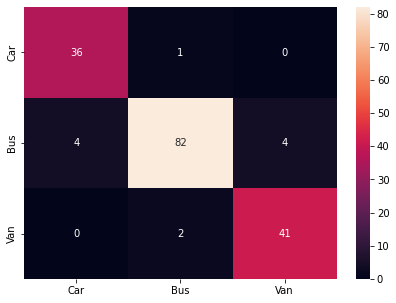

In [461]:
# Confusion Matrix 
cm = confusion_matrix(y_test, y_test_pred_linear, labels = [0, 1, 2])

df_cm = pd.DataFrame(cm, index = [i for i in ["Car","Bus","Van"]],
                  columns = [i for i in ["Car","Bus","Van"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot = True , fmt = 'g')
plt.show()

#### RBF SVM Base Model

In [462]:
# A.	Train a base Classification model using SVM
# Build and fit SVM Classification RBF model
svc_model_rbf = SVC(kernel = 'rbf', degree = 2, C = 0.1)
svc_model_rbf.fit(X_train, y_train)

SVC(C=0.1, degree=2)

In [463]:
# Make predictions on Train and Test data
y_train_pred_rbf = svc_model_rbf.predict(X_train)
y_test_pred_rbf = svc_model_rbf.predict(X_test)

In [464]:
# Classification Accuracy
print('Training data accuracy: ', accuracy_score(y_train_pred_rbf, y_train))
print('Test data accuracy: ', accuracy_score(y_test_pred_rbf, y_test))

Training data accuracy:  0.8683431952662722
Test data accuracy:  0.8941176470588236


In [465]:
# B.	Print Classification metrics for train data
# Print the model performance metrics
print('Model Performance Metrics - SVM Classification RBF model')
print('-------------------------------------------------------')
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_pred_rbf))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_pred_rbf))

Model Performance Metrics - SVM Classification RBF model
-------------------------------------------------------
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.78      0.85       181
           1       0.85      0.93      0.89       339
           2       0.84      0.83      0.84       156

    accuracy                           0.87       676
   macro avg       0.88      0.85      0.86       676
weighted avg       0.87      0.87      0.87       676

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.78      0.87        37
           1       0.90      0.96      0.92        90
           2       0.84      0.86      0.85        43

    accuracy                           0.89       170
   macro avg       0.90      0.87      0.88       170
weighted avg       0.90      0.89

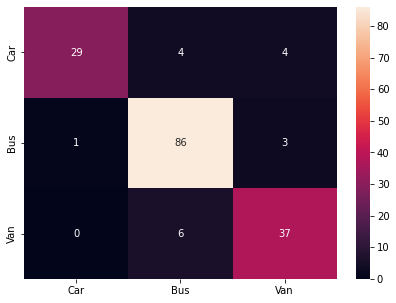

In [466]:
# Confusion Matrix 
cm = confusion_matrix(y_test, y_test_pred_rbf, labels = [0, 1, 2])

df_cm = pd.DataFrame(cm, index = [i for i in ["Car","Bus","Van"]],
                  columns = [i for i in ["Car","Bus","Van"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot = True , fmt = 'g')
plt.show()

#### Poly SVM Base Model

In [467]:
# A.	Train a base Classification model using SVM
# Build and fit SVM Classification Poly model
svc_model_poly = SVC(kernel = 'poly', degree = 2, C = 0.1, gamma = 1)
svc_model_poly.fit(X_train, y_train)

SVC(C=0.1, degree=2, gamma=1, kernel='poly')

In [468]:
# Make predictions on Train and Test data
y_train_pred_poly = svc_model_rbf.predict(X_train)
y_test_pred_poly = svc_model_rbf.predict(X_test)

In [469]:
# Classification Accuracy
print('Training data accuracy: ', accuracy_score(y_train_pred_poly, y_train))
print('Test data accuracy: ', accuracy_score(y_test_pred_poly, y_test))

Training data accuracy:  0.8683431952662722
Test data accuracy:  0.8941176470588236


In [470]:
# B.	Print Classification metrics for train data
# Print the model performance metrics
print('Model Performance Metrics - SVM Classification Poly model')
print('-------------------------------------------------------')
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_pred_poly))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_pred_poly))

Model Performance Metrics - SVM Classification Poly model
-------------------------------------------------------
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.78      0.85       181
           1       0.85      0.93      0.89       339
           2       0.84      0.83      0.84       156

    accuracy                           0.87       676
   macro avg       0.88      0.85      0.86       676
weighted avg       0.87      0.87      0.87       676

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.78      0.87        37
           1       0.90      0.96      0.92        90
           2       0.84      0.86      0.85        43

    accuracy                           0.89       170
   macro avg       0.90      0.87      0.88       170
weighted avg       0.90      0.8

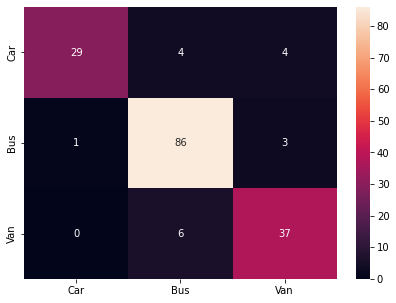

In [471]:
# Confusion Matrix 
cm = confusion_matrix(y_test, y_test_pred_poly, labels = [0, 1, 2])

df_cm = pd.DataFrame(cm, index = [i for i in ["Car","Bus","Van"]],
                  columns = [i for i in ["Car","Bus","Van"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot = True , fmt = 'g')
plt.show()

### PCA & Dimensionality Reduction

#### Finding Eigen Vectors and Values using Covariance Matrix on the whole dataset

In [472]:
# Covariance Matrix
cov_matrix = np.cov(XScaled.T)

In [473]:
print("Covariance Matrix: ")
pd.DataFrame(cov_matrix).T

Covariance Matrix: 


0         1         2         3         4         5         6   \
0   1.001183  0.685698  0.790863  0.690560  0.091643  0.148425  0.813582   
1   0.685698  1.001183  0.793258  0.621647  0.153960  0.251764  0.848941   
2   0.790863  0.793258  1.001183  0.767942  0.158643  0.265000  0.906147   
3   0.690560  0.621647  0.767942  1.001183  0.664232  0.450584  0.735298   
4   0.091643  0.153960  0.158643  0.664232  1.001183  0.649491  0.103855   
5   0.148425  0.251764  0.265000  0.450584  0.649491  1.001183  0.166388   
6   0.813582  0.848941  0.906147  0.735298  0.103855  0.166388  1.001183   
7  -0.789683 -0.822444 -0.912385 -0.790416 -0.183252 -0.180353 -0.972751   
8   0.814657  0.844398  0.894082  0.709224  0.079698  0.161693  0.990922   
9   0.676943  0.962456  0.775444  0.569623  0.127059  0.306305  0.810041   
10  0.762972  0.797248  0.862539  0.794354  0.273233  0.319334  0.949785   
11  0.814976  0.836935  0.887066  0.719286  0.089294  0.143423  0.994187   
12  0.585935  0.926912  0.706607  0.537007  0.122115  0.189967  0.800821   
13 -0.249888  0.052008 -0.226211 -0.180611  0.153131  0.296085 -0.027574   
14  0.236358  0.144368  0.114059  0.048770 -0.058440  0.015618  0.074546   
15  0.157200 -0.011452  0.265861  0.173946 -0.032014  0.043473  0.212680   
16  0.298890 -0.104550  0.146271  0.382666  0.240170 -0.026111  0.005634   
17  0.365984  0.046406  0.333126  0.471867  0.268042  0.144089  0.118958   

          7         8         9         10        11        12        13  \
0  -0.789683  0.814657  0.676943  0.762972  0.814976  0.585935 -0.249888   
1  -0.822444  0.844398  0.962456  0.797248  0.836935  0.926912  0.052008   
2  -0.912385  0.894082  0.775444  0.862539  0.887066  0.706607 -0.226211   
3  -0.790416  0.709224  0.569623  0.794354  0.719286  0.537007 -0.180611   
4  -0.183252  0.079698  0.127059  0.273233  0.089294  0.122115  0.153131   
5  -0.180353  0.161693  0.306305  0.319334  0.143423  0.189967  0.296085   
6  -0.972751  0.990922  0.810041  0.949785  0.994187  0.800821 -0.027574   
7   1.001183 -0.950119 -0.776772 -0.937490 -0.954945 -0.767221  0.103424   
8  -0.950119  1.001183  0.811893  0.935333  0.989383  0.797632 -0.015514   
9  -0.776772  0.811893  1.001183  0.745866  0.795555  0.867476  0.041671   
10 -0.937490  0.935333  0.745866  1.001183  0.946797  0.779838  0.113212   
11 -0.954945  0.989383  0.795555  0.946797  1.001183  0.795958 -0.015419   
12 -0.767221  0.797632  0.867476  0.779838  0.795958  1.001183  0.191699   
13  0.103424 -0.015514  0.041671  0.113212 -0.015419  0.191699  1.001183   
14 -0.052662  0.083866  0.136012  0.036772  0.076968  0.166680 -0.088460   
15 -0.185272  0.214955  0.001367  0.194468  0.201048 -0.056220 -0.126332   
16 -0.115262 -0.018671 -0.104071  0.014236  0.006226 -0.224716 -0.749751   
17 -0.217161  0.099404  0.076860  0.085797  0.103057 -0.118141 -0.803072   

          14        15        16        17  
0   0.236358  0.157200  0.298890  0.365984  
1   0.144368 -0.011452 -0.104550  0.046406  
2   0.114059  0.265861  0.146271  0.333126  
3   0.048770  0.173946  0.382666  0.471867  
4  -0.058440 -0.032014  0.240170  0.268042  
5   0.015618  0.043473 -0.026111  0.144089  
6   0.074546  0.212680  0.005634  0.118958  
7  -0.052662 -0.185272 -0.115262 -0.217161  
8   0.083866  0.214955 -0.018671  0.099404  
9   0.136012  0.001367 -0.104071  0.076860  
10  0.036772  0.194468  0.014236  0.085797  
11  0.076968  0.201048  0.006226  0.103057  
12  0.166680 -0.056220 -0.224716 -0.118141  
13 -0.088460 -0.126332 -0.749751 -0.803072  
14  1.001183 -0.035032  0.115434  0.097241  
15 -0.035032  1.001183  0.077402  0.205233  
16  0.115434  0.077402  1.001183  0.893638  
17  0.097241  0.205233  0.893638  1.001183

In [474]:
# Find the Eigen values and Eigen vectors
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [475]:
print("Eigen Vectors: ")
pd.DataFrame(eig_vecs).T

Eigen Vectors: 


0         1         2         3         4         5         6   \
0   0.275284  0.293258  0.304609  0.267607  0.080504  0.097276  0.317093   
1   0.126954 -0.125577  0.072952  0.189634  0.122175 -0.010748 -0.048118   
2   0.119922  0.024821  0.056014 -0.275074 -0.642013 -0.591801  0.097628   
3  -0.078384 -0.187337  0.071201  0.042605 -0.032726 -0.031415  0.095749   
4  -0.069518  0.085065 -0.040665  0.046147  0.040549 -0.213433  0.015485   
5   0.144875 -0.302731 -0.138406  0.248137  0.236933 -0.419331  0.116100   
6   0.451862 -0.249103  0.074035 -0.176913 -0.397877  0.503414  0.064988   
7   0.566137  0.179852 -0.434749 -0.101998  0.068715 -0.161153 -0.100688   
8   0.484418  0.014157  0.167572  0.230314  0.277128 -0.148032 -0.054457   
9   0.260076 -0.098078  0.205032  0.047789 -0.108075  0.118266 -0.165167   
10 -0.046534 -0.003013 -0.706489  0.107152 -0.038517  0.262254  0.170406   
11  0.012034 -0.213635  0.000346 -0.157050  0.110107 -0.132935  0.095588   
12 -0.156137 -0.015012  0.237111  0.030782  0.039280 -0.037288 -0.039464   
13 -0.010073 -0.009159  0.006946 -0.042016  0.031270 -0.009999  0.840976   
14 -0.006005  0.073806 -0.025079 -0.035988  0.012585 -0.028417 -0.249653   
15  0.060049 -0.426993  0.146240 -0.521375  0.363120  0.062780  0.064050   
16 -0.065096 -0.261245  0.078265  0.560792 -0.322277  0.048781  0.018184   
17 -0.009678 -0.597863 -0.157257  0.166552 -0.063614 -0.086317 -0.079869   

          7         8         9         10        11        12        13  \
0  -0.314133  0.313959  0.282831  0.309280  0.313788  0.272047 -0.020814   
1  -0.012750 -0.059935 -0.116221 -0.062281 -0.053784 -0.209233 -0.488525   
2  -0.057648  0.109512  0.017064 -0.056324  0.108841  0.031464 -0.286277   
3  -0.082290  0.092458 -0.188006  0.119844  0.091745 -0.200095  0.065505   
4  -0.076852 -0.002176  0.060637  0.000456  0.019555  0.061599 -0.145530   
5  -0.141840  0.098056 -0.461675  0.236225  0.157820 -0.135576  0.241357   
6   0.013811  0.096657 -0.104552  0.114623  0.083735 -0.373944  0.111953   
7   0.215497 -0.063593  0.249496 -0.050210 -0.043765  0.108474  0.340878   
8   0.156867 -0.005250  0.061036 -0.297588 -0.083367 -0.241655 -0.320222   
9   0.151612 -0.193778 -0.469060  0.129986 -0.158204  0.686494 -0.127648   
10  0.057663  0.272514 -0.141434 -0.077260  0.243226  0.158888 -0.419189   
11  0.122013  0.251281 -0.124529 -0.215012  0.175685  0.190336  0.285711   
12  0.810395  0.271573  0.075711  0.153181  0.307948 -0.037609 -0.043465   
13  0.238189 -0.101155 -0.016948  0.006047 -0.469203  0.011748  0.003148   
14 -0.042148  0.717396 -0.047023  0.171504 -0.616589 -0.026491 -0.014296   
15 -0.186946  0.180913  0.174070 -0.277272  0.078514  0.200684 -0.146862   
16 -0.025033  0.164491  0.147280 -0.564445 -0.068586  0.147099  0.232941   
17  0.042152 -0.144491  0.511259  0.453237 -0.126992  0.109983 -0.111272   

          14        15        16        17  
0   0.041456  0.058225  0.030280  0.074145  
1   0.055090  0.124085  0.540915  0.540354  
2   0.115679  0.075283 -0.008736 -0.039524  
3  -0.604794  0.666114 -0.105526 -0.047489  
4  -0.729190 -0.599196  0.100602  0.029861  
5   0.203209 -0.191961  0.156939 -0.241223  
6  -0.080633 -0.284559  0.018145  0.015724  
7  -0.156488  0.208774  0.304580  0.030419  
8  -0.022105 -0.010176 -0.517223 -0.171506  
9  -0.098364  0.035515 -0.019396 -0.064131  
10  0.012545  0.032781 -0.120598 -0.091960  
11 -0.001603 -0.083259 -0.353724  0.685618  
12 -0.009943 -0.026892  0.186595 -0.142380  
13 -0.003032 -0.012532  0.043428 -0.006477  
14  0.001743 -0.007089  0.007679  0.006377  
15 -0.017336  0.031369  0.231451 -0.288502  
16 -0.027759  0.002782  0.190630 -0.120966  
17  0.024094 -0.009897 -0.182212  0.090401

In [476]:
pd.DataFrame(eig_vals, columns = ['Eigen Values']).T

0         1         2         3         4         5   \
Eigen Values  9.404603  3.014922  1.903525  1.179937  0.917261  0.539993   

                   6         7         8         9         10        11  \
Eigen Values  0.35887  0.221932  0.160609  0.091857  0.066499  0.046601   

                    12        13        14        15        16        17  
Eigen Values  0.035795  0.002964  0.010026  0.027412  0.017917  0.020579

In [477]:
# Find Explained and Cumulative Variance
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse = True)]
cum_var_exp = np.cumsum(var_exp)   # array of size =  as many PC dimensions

In [478]:
pd.DataFrame(var_exp, columns = ['Explained Variance Ratio']).T

0          1          2        3         4   \
Explained Variance Ratio  52.186034  16.729768  10.562639  6.54746  5.089869   

                                5         6         7         8         9   \
Explained Variance Ratio  2.996413  1.991366  1.231501  0.891215  0.509715   

                                10        11        12        13        14  \
Explained Variance Ratio  0.369004  0.258586  0.198624  0.152109  0.114194   

                                15        16       17  
Explained Variance Ratio  0.099419  0.055633  0.01645

In [479]:
pd.DataFrame(cum_var_exp, columns = ['Cumulative Variance Ratio']).T

0          1          2          3   \
Cumulative Variance Ratio  52.186034  68.915802  79.478441  86.025901   

                                 4          5          6          7   \
Cumulative Variance Ratio  91.11577  94.112183  96.103549  97.335049   

                                  8          9          10        11  \
Cumulative Variance Ratio  98.226265  98.735979  99.104984  99.36357   

                                  12         13         14         15  \
Cumulative Variance Ratio  99.562195  99.714304  99.828498  99.927917   

                                 16     17  
Cumulative Variance Ratio  99.98355  100.0

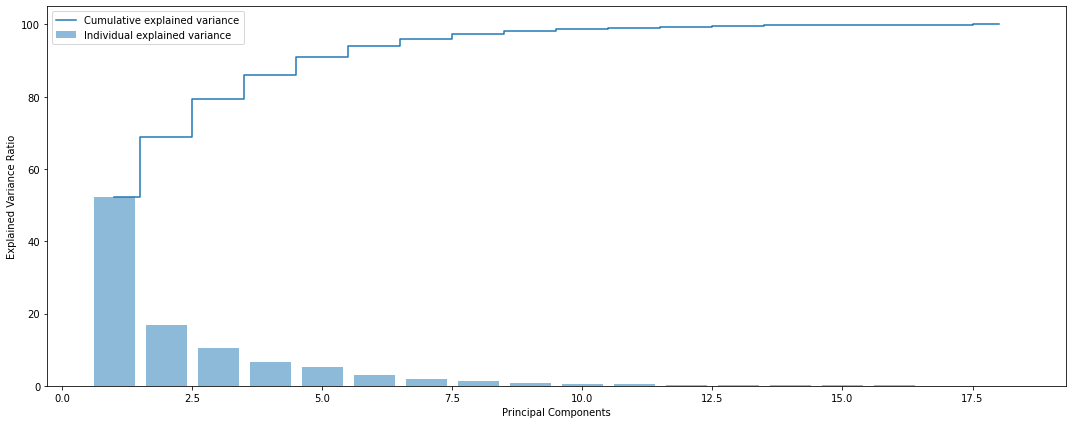

In [480]:
# Ploting Explained and Cumulative Variance
plt.figure(figsize = (15 , 6))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where = 'mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

#### PCA Base Model

In [481]:
# C.	Apply PCA on the data with 10 components.
pca = PCA(n_components = 10)
pca.fit(XScaled)

PCA(n_components=10)

In [482]:
print("Eigen Vectors: ")
pd.DataFrame(pca.components_).T

Eigen Vectors: 


0         1         2         3         4         5         6  \
0   0.275284 -0.126954 -0.119922  0.078384  0.069518  0.144875  0.451862   
1   0.293258  0.125577 -0.024821  0.187337 -0.085065 -0.302731 -0.249103   
2   0.304609 -0.072952 -0.056014 -0.071201  0.040665 -0.138406  0.074035   
3   0.267607 -0.189634  0.275074 -0.042605 -0.046147  0.248137 -0.176913   
4   0.080504 -0.122175  0.642013  0.032726 -0.040549  0.236933 -0.397877   
5   0.097276  0.010748  0.591801  0.031415  0.213433 -0.419331  0.503414   
6   0.317093  0.048118 -0.097628 -0.095749 -0.015485  0.116100  0.064988   
7  -0.314133  0.012750  0.057648  0.082290  0.076852 -0.141840  0.013811   
8   0.313959  0.059935 -0.109512 -0.092458  0.002176  0.098056  0.096657   
9   0.282831  0.116221 -0.017064  0.188006 -0.060637 -0.461675 -0.104552   
10  0.309280  0.062281  0.056324 -0.119844 -0.000456  0.236225  0.114623   
11  0.313788  0.053784 -0.108841 -0.091745 -0.019555  0.157820  0.083735   
12  0.272047  0.209233 -0.031464  0.200095 -0.061599 -0.135576 -0.373944   
13 -0.020814  0.488525  0.286277 -0.065505  0.145530  0.241357  0.111953   
14  0.041456 -0.055090 -0.115679  0.604794  0.729190  0.203209 -0.080633   
15  0.058225 -0.124085 -0.075283 -0.666114  0.599196 -0.191961 -0.284559   
16  0.030280 -0.540915  0.008736  0.105526 -0.100602  0.156939  0.018145   
17  0.074145 -0.540354  0.039524  0.047489 -0.029861 -0.241223  0.015724   

           7         8         9  
0  -0.566137 -0.484418 -0.260076  
1  -0.179852 -0.014157  0.098078  
2   0.434749 -0.167572 -0.205032  
3   0.101998 -0.230314 -0.047789  
4  -0.068715 -0.277128  0.108075  
5   0.161153  0.148032 -0.118266  
6   0.100688  0.054457  0.165167  
7  -0.215497 -0.156867 -0.151612  
8   0.063593  0.005250  0.193778  
9  -0.249496 -0.061036  0.469060  
10  0.050210  0.297588 -0.129986  
11  0.043765  0.083367  0.158204  
12 -0.108474  0.241655 -0.686494  
13 -0.340878  0.320222  0.127648  
14  0.156488  0.022105  0.098364  
15 -0.208774  0.010176 -0.035515  
16 -0.304580  0.517223  0.019396  
17 -0.030419  0.171506  0.064131

In [483]:
print("Eigen Values: ")
pd.DataFrame(pca.explained_variance_, columns = ['Eigen Values']).T

Eigen Values: 


0         1         2         3         4         5  \
Eigen Values  9.404603  3.014922  1.903525  1.179937  0.917261  0.539993   

                    6         7         8         9  
Eigen Values  0.35887  0.221932  0.160609  0.091857

In [484]:
pd.DataFrame(pca.explained_variance_ratio_, columns = ['Explained Variance Ratio']).T

0         1         2         3         4  \
Explained Variance Ratio  0.52186  0.167298  0.105626  0.065475  0.050899   

                                 5         6         7         8         9  
Explained Variance Ratio  0.029964  0.019914  0.012315  0.008912  0.005097

In [485]:
pd.DataFrame(np.cumsum(pca.explained_variance_ratio_), columns = ['Cumulative Variance Ratio']).T

0         1         2         3         4  \
Cumulative Variance Ratio  0.52186  0.689158  0.794784  0.860259  0.911158   

                                  5         6        7         8        9  
Cumulative Variance Ratio  0.941122  0.961035  0.97335  0.982263  0.98736

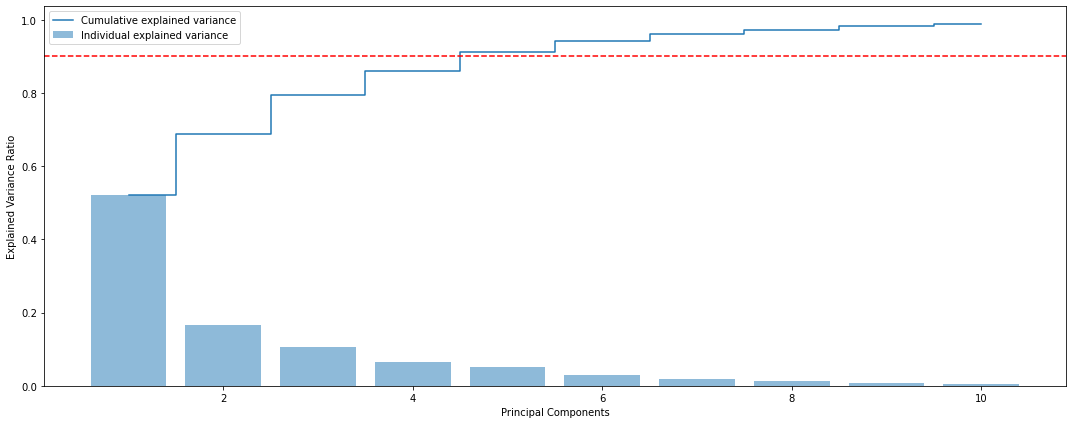

In [486]:
# D.	Visualize Cumulative Variance Explained with Number of Components
# E.	Draw a horizontal line on the above plot to highlight the threshold of 90%. 
plt.figure(figsize = (15 , 6))
plt.bar(range(1, pca.explained_variance_.size + 1), pca.explained_variance_ratio_, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, pca.explained_variance_.size + 1), np.cumsum(pca.explained_variance_ratio_), where = 'mid', label = 'Cumulative explained variance')
plt.axhline(y = 0.9, color = 'r', linestyle = '--')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

#### Observations: 

1) The PCA ensures reduction in correlation and thus reduction in dimensional complexity such that we reduce overfitting without much of data loss.

2) We can see that 4 dimensions explain more than 90% of the variance in the data set. Therefore, choosing n = 4 for building the final model.

### Applying Dimensionality Reduction

#### PCA Dimensionally Reduced Model

In [487]:
# F.	Apply PCA on the data. This time Select Minimum Components with 90% or above variance explained
pca4 = PCA(n_components = 4)
pca4.fit(XScaled)

PCA(n_components=4)

In [488]:
print("Eigen Vectors: ")
pd.DataFrame(pca4.components_).T.head()

Eigen Vectors: 


0         1         2         3
0  0.275284 -0.126954 -0.119922  0.078384
1  0.293258  0.125577 -0.024821  0.187337
2  0.304609 -0.072952 -0.056014 -0.071201
3  0.267607 -0.189634  0.275074 -0.042605
4  0.080504 -0.122175  0.642013  0.032726

In [489]:
pd.DataFrame(pca4.explained_variance_, columns = ['Eigen Values']).T

0         1         2         3
Eigen Values  9.404603  3.014922  1.903525  1.179937

In [490]:
pd.DataFrame(pca4.explained_variance_ratio_, columns = ['Explained Variance Ratio']).T

0         1         2         3
Explained Variance Ratio  0.52186  0.167298  0.105626  0.065475

In [491]:
pd.DataFrame(np.cumsum(pca4.explained_variance_ratio_), columns = ['Cumulative Variance Ratio']).T

0         1         2         3
Cumulative Variance Ratio  0.52186  0.689158  0.794784  0.860259

In [492]:
# Transform the Scaled data with PCA 
Xpca4 = pca4.transform(XScaled)

In [493]:
Xpca4.shape

(846, 4)

In [494]:
# sns.pairplot(df_Xpca4, corner = True);

In [495]:
# Split X and y into training and test set in 80:20 ratio
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(Xpca4, y, test_size = 0.20, random_state = 1)

#### Dimensionally reduced SVM Base Model

In [496]:
# G.	Train SVM model on components selected from above step.
# H.	Print Classification metrics for train data of above model and share insights. 

# Build and fit SVM Linear Classification model
svc_model = SVC(kernel = 'linear')
svc_model.fit(X_train_pca, y_train_pca)

# Make predictions on Train and Test data
y_train_pca_pred = svc_model.predict(X_train_pca)
y_test_pca_pred = svc_model.predict(X_test_pca)

# Classification Accuracy
print('Model Performance Metrics - SVM Classification {} model'.format(svc_model))
print('*' * 50)
print('-------------------------------------------------------')
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train_pca, y_train_pca_pred))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test_pca, y_test_pca_pred))
print('\n')



# Build and fit SVM RBF Classification model
svc_model = SVC(kernel = 'rbf')
svc_model.fit(X_train_pca, y_train_pca)

# Make predictions on Train and Test data
y_train_pca_pred = svc_model.predict(X_train_pca)
y_test_pca_pred = svc_model.predict(X_test_pca)

# Classification Accuracy
print('Model Performance Metrics - SVM Classification {} model'.format(svc_model))
print('*' * 50)
print('-------------------------------------------------------')
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train_pca, y_train_pca_pred))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test_pca, y_test_pca_pred))
print('\n')



# Build and fit SVM Poly Classification model
svc_model = SVC(kernel = 'poly')
svc_model.fit(X_train_pca, y_train_pca)

# Make predictions on Train and Test data
y_train_pca_pred = svc_model.predict(X_train_pca)
y_test_pca_pred = svc_model.predict(X_test_pca)

# Classification Accuracy
print('Model Performance Metrics - SVM Classification {} model'.format(svc_model))
print('*' * 50)
print('-------------------------------------------------------')
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train_pca, y_train_pca_pred))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test_pca, y_test_pca_pred))

Model Performance Metrics - SVM Classification SVC(kernel='linear') model
**************************************************
-------------------------------------------------------
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.60      0.50      0.54       181
           1       0.78      0.84      0.81       339
           2       0.53      0.54      0.53       156

    accuracy                           0.68       676
   macro avg       0.64      0.63      0.63       676
weighted avg       0.67      0.68      0.68       676

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.39      0.38      0.38        37
           1       0.79      0.79      0.79        90
           2       0.48      0.49      0.48        43

    accuracy                           0.62       170
   macro avg       

#### Observations:

1) Amongst the Base SVM models, we can that the RBF kernel gives the highest accuracy followed by, Poly and Linear kernels.

2) The SVM-RBF Base model gives a training accuracy of 79% and test accuracy of 80%.

3) The SVM-Linear and SVM-Poly Base models give a test accuracy of 62% and 65% respectively.

## 4.	Performance Improvement: 

In [497]:
# A.	Train another SVM on the components out of PCA. Tune the parameters to improve performance. 
# Build and fit SVM Classification model
svc_model_rbf = SVC(kernel = 'rbf') # Choosing the Base model kernel with highest test accuracy
svc_model_rbf.fit(X_train_pca, y_train_pca)

SVC()

In [498]:
# Make predictions on Train and Test data
y_train_pca_pred = svc_model_rbf.predict(X_train_pca)
y_test_pca_pred = svc_model_rbf.predict(X_test_pca)

In [499]:
# Classification Accuracy
print('Training data accuracy: ', accuracy_score(y_train_pca_pred, y_train_pca))
print('Test data accuracy: ', accuracy_score(y_test_pca_pred, y_test_pca))

Training data accuracy:  0.7914201183431953
Test data accuracy:  0.8


### Base Model Hyper Parameter Tuning using GridSearchCV

In [500]:
# Create the model instance
model = SVC()
# Hyper Parameters Set
params = {
         'kernel': ['linear','rbf', 'poly'],
         'C': [0, 0.01, 0.05, 0.5, 1], 
         'gamma':[0, 0.01, 0.02 , 0.03 , 0.04, 0.05]
         }

In [501]:
# Making model with hyper parameters set
gs_cv = GridSearchCV(model, param_grid = params, n_jobs = -1, cv = 10, scoring = 'accuracy')

In [502]:
# Learning and fitting the model
gs_cv.fit(X_train_pca, y_train_pca)

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0, 0.01, 0.05, 0.5, 1],
                         'gamma': [0, 0.01, 0.02, 0.03, 0.04, 0.05],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

#### Choosing the ideal SVM Classification model

In [503]:
# B.	Share best Parameters observed from above step. 
# Print best hyper parameters set
print("Best Hyper Parameters for Model Training: ", gs_cv.best_params_)

Best Hyper Parameters for Model Training:  {'C': 1, 'gamma': 0.05, 'kernel': 'rbf'}


#### Dimensionally reduced SVM-RBF Model

In [504]:
# A. Tune the parameters to improve performance. 
# Build and fit SVM Classification RBF model
svc_model_rbf = SVC(kernel = 'rbf', C = 1, gamma = 0.05)
svc_model_rbf.fit(X_train_pca, y_train_pca)

SVC(C=1, gamma=0.05)

In [505]:
# Make predictions on Train and Test data
y_train_pca_pred = svc_model_rbf.predict(X_train_pca)
y_test_pca_pred = svc_model_rbf.predict(X_test_pca)

In [506]:
# Classification Accuracy
print('Training data accuracy: ', accuracy_score(y_train_pca_pred, y_train_pca))
print('Test data accuracy: ', accuracy_score(y_test_pca_pred, y_test_pca))

Training data accuracy:  0.7869822485207101
Test data accuracy:  0.7823529411764706


In [507]:
# C.	Print Classification metrics for train data of above model and share relative improvement in performance in all the models along with insights
# Print the model performance metrics
print('Model Performance Metrics - SVM Classification RBF model after PCA and Dimensionality Reduction')
print('-------------------------------------------------------')
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train_pca, y_train_pca_pred))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test_pca, y_test_pca_pred))

Model Performance Metrics - SVM Classification RBF model after PCA and Dimensionality Reduction
-------------------------------------------------------
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.64      0.74       181
           1       0.85      0.86      0.86       339
           2       0.63      0.79      0.70       156

    accuracy                           0.79       676
   macro avg       0.78      0.76      0.76       676
weighted avg       0.80      0.79      0.79       676

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.68      0.77        37
           1       0.84      0.81      0.82        90
           2       0.64      0.81      0.71        43

    accuracy                           0.78       170
   macro avg       0.79      0.77      0.77     

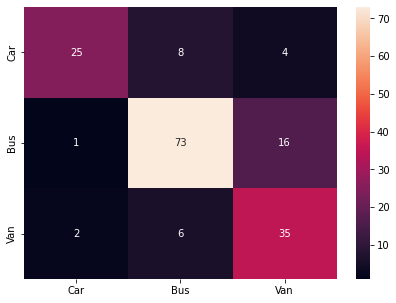

In [508]:
# Confusion Matrix 
cm = confusion_matrix(y_test_pca, y_test_pca_pred, labels = [0, 1, 2])

df_cm = pd.DataFrame(cm, index = [i for i in ["Car","Bus","Van"]],
                  columns = [i for i in ["Car","Bus","Van"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot = True , fmt = 'g')
plt.show()

#### Observations:

1) The SVM-RBF Base model gives a training accuracy of 79% and test accuracy of 80%.

2) After Hypertuning and selecting the ideal SVM model, the Dimensionally reduced SVM-RBF Model gives a training and test accuracy of 78% each.

#### 3) Since there is a accuracy decrease after hyper tuning the model, we can choose the Dimensionally reduced SVM-RBF Base model as the final classification model.

### Comparing the Final  model with other Classification models and validating using k-fold cross validation

In [509]:
# initializing all the Classification models
LogR_model = LogisticRegression()
KNN_model = KNeighborsClassifier(n_neighbors = 5)
GN_model = GaussianNB()
svc_model_rbf = SVC(kernel = 'rbf')
dec_tree_model = DecisionTreeClassifier()
xgb_clas_model = XGBClassifier()

LogR: 0.904202 (0.019715)
KNN: 0.854706 (0.046003)
NB: 0.586232 (0.039741)
SVM-rbf: 0.680854 (0.048469)
D-Tree: 0.897143 (0.031350)
XGBoost: 0.964524 (0.029863)


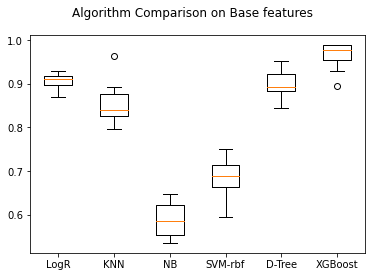

In [510]:
# Algorithm Comparison on Base features
seed = 1

# prepare models
models = []
models.append(('LogR', LogR_model))
models.append(('KNN', KNN_model))
models.append(('NB', GN_model))
models.append(('SVM-rbf', svc_model_rbf))
models.append(('D-Tree', dec_tree_model))
models.append(('XGBoost', xgb_clas_model))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits = 10, random_state = seed, shuffle = True)
    cv_results = model_selection.cross_val_score(model, X, y, cv = kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison on Base features')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

LogR: 0.946849 (0.015937)
KNN: 0.918431 (0.024540)
NB: 0.586232 (0.039741)
SVM-rbf: 0.963347 (0.016345)
D-Tree: 0.896008 (0.024550)
XGBoost: 0.964524 (0.029863)


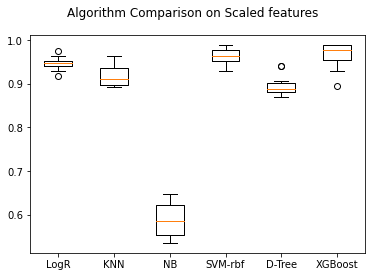

In [511]:
# Algorithm Comparison on Scaled features
seed = 1

# prepare models
models = []
models.append(('LogR', LogR_model))
models.append(('KNN', KNN_model))
models.append(('NB', GN_model))
models.append(('SVM-rbf', svc_model_rbf))
models.append(('D-Tree', dec_tree_model))
models.append(('XGBoost', xgb_clas_model))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits = 10, random_state = seed, shuffle = True)
    cv_results = model_selection.cross_val_score(model, XScaled, y, cv = kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison on Scaled features')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

LogR: 0.641891 (0.037977)
KNN: 0.762339 (0.029220)
NB: 0.599258 (0.034765)
SVM-rbf: 0.770546 (0.035336)
D-Tree: 0.716457 (0.051670)
XGBoost: 0.784874 (0.029860)


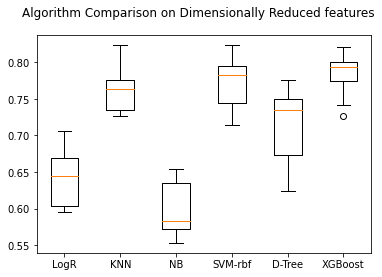

In [512]:
# Algorithm Comparison on Dimensionally Reduced features 
seed = 1

# prepare models
models = []
models.append(('LogR', LogR_model))
models.append(('KNN', KNN_model))
models.append(('NB', GN_model))
models.append(('SVM-rbf', svc_model_rbf))
models.append(('D-Tree', dec_tree_model))
models.append(('XGBoost', xgb_clas_model))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits = 10, random_state = seed, shuffle = True)
    cv_results = model_selection.cross_val_score(model, Xpca4, y, cv = kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison on Dimensionally Reduced features')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### Observations:

1) The model accuracy using k-fold cross validation for SVM-RBF model is 77%, which is a 3% drop from the SVM-RBF Base model which we chose as the Final classification model.

2) We can see that the performance of most models increases significantly from the Base to Scaled datasets but decreases after PCA.

2) Decision Tree and XGBoost Classifier perform equally well on both the Base and Scaled datasets, which points to overfitting in these models.

### Applying SMOTE on the Target variable to handle imbalanced data

In [513]:
# Using SMOTE on Scaled data
smote = SMOTE(random_state = 1)
X_smote, y_smote = smote.fit_resample(XScaled, y)

In [514]:
# Checking target distribution before sampling
print('Before sampling:')
y.value_counts().to_frame()

Before sampling:


0
0     
1  429
0  218
2  199

In [515]:
# Checking target distribution after sampling
print('After sampling with SMOTE:')
y_smote.value_counts().to_frame()

After sampling with SMOTE:


0
0     
0  429
1  429
2  429

LogR: 0.965843 (0.018700)
KNN: 0.945597 (0.025513)
NB: 0.595173 (0.035009)
SVM-rbf: 0.976702 (0.019915)
D-Tree: 0.929282 (0.025866)
XGBoost: 0.972032 (0.017082)


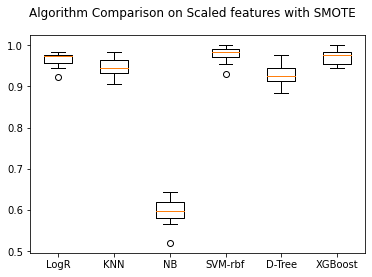

In [516]:
# Algorithm Comparison on Scaled features with SMOTE
seed = 1

# prepare models
models = []
models.append(('LogR', LogR_model))
models.append(('KNN', KNN_model))
models.append(('NB', GN_model))
models.append(('SVM-rbf', svc_model_rbf))
models.append(('D-Tree', dec_tree_model))
models.append(('XGBoost', xgb_clas_model))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits = 10, random_state = seed, shuffle = True)
    cv_results = model_selection.cross_val_score(model, X_smote, y_smote, cv = kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison on Scaled features with SMOTE')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [517]:
# Using SMOTE on Dimensionally Reduced data
smote = SMOTE(random_state = 1)
X_smote, y_smote = smote.fit_resample(Xpca4, y)

LogR: 0.590613 (0.051021)
KNN: 0.846148 (0.036204)
NB: 0.570325 (0.043512)
SVM-rbf: 0.791770 (0.035455)
D-Tree: 0.829076 (0.037747)
XGBoost: 0.860907 (0.029552)


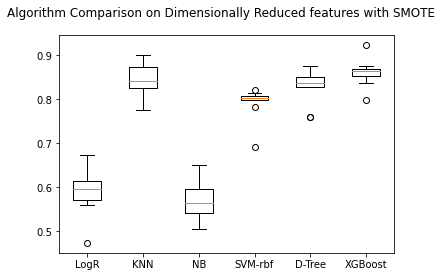

In [518]:
# Algorithm Comparison on Dimensionally Reduced features with SMOTE
seed = 1

# prepare models
models = []
models.append(('LogR', LogR_model))
models.append(('KNN', KNN_model))
models.append(('NB', GN_model))
models.append(('SVM-rbf', svc_model_rbf))
models.append(('D-Tree', dec_tree_model))
models.append(('XGBoost', xgb_clas_model))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits = 10, random_state = seed, shuffle = True)
    cv_results = model_selection.cross_val_score(model, X_smote, y_smote, cv = kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison on Dimensionally Reduced features with SMOTE')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### Observations:

1) The performance of SVM-RBF model on the dimensionally reduced dataset increases from 77% to 79% after balacing the dataset.

2) We can see that all the model performances improve marginally on the Scaled and Dimensionally Reduced datasets after balacing.

## 5.	Data Understanding & Cleaning:

#### A.	Explain pre-requisite/assumptions of PCA. 

1. PCA assumes a correlation between features.

2. PCA is sensitive to the scale of the features.

3. PCA is not robust against outliers.

4. The algorithm is not well suited to capturing non-linear relationships.

#### B.	Explain advantages and limitations of PCA. 

##### Advantages -

1) PCA reduces the curse of dimensionality. PCA lowers the dimensions of the training dataset, which prevents the predictive algorithms from over fitting.

2) Principal components are independent of each other, so removes correlated features.

3) Reduction of noise since the maximum variation basis is chosen and so the small variations in the background are ignored automatically.

##### Limitations -

1) Even Though PCA covers maximum variance amid data features, sometimes it may skip a bit of information in comparison to the actual list of features.


2) Implementing PCA over datasets leads to transforming actual features in principal components that are linear combinations of actual features, therefore principle components are difficult to read or interpret as compared to actual features.

3) Data must be standardized before implementing PCA, else optimal PCA’s can’t be found.

## End of Part B

## End of Project